# GROUP PROJECT - GRAMENIER CASE STUDY
   GROUP DETAILS - Deepak Pandey, Kedarnath Goud Kothinti, Vivek Padmanabhan, Ravindra Singh

# Case Study Objective:
  Large online loan market place Consumer Finance Company which provides loan at low interest rates 
  wants to indentify risky loan applicants. By identifying risky loan applicants company can cut down
  the amount of credit loss.
  
  Find the driving factors which can be strong indicator of loan defaulters. Help company to use the findings
  from this case study for its portfolio and risk management. 

In [407]:
# Checkpoint#1: DATA LOADING and CLEANING

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Setting dtype for column 'next_pymnt_d' as a mixed datatype warning was received while loading the file

# While loading, use the following function to convert percent to float
def p2f(x):
    return float(x.strip('%'))
def term2int(y):
    return int(y.strip('months'))

loan_stats = pd.read_csv('./loan.csv', sep=',' , encoding='ISO-8859-1', dtype={"next_pymnt_d": object}, converters={'int_rate':p2f, 'term':term2int})
loan_stats.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [408]:
loan_stats.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [409]:
# DATA CLEANING (Fix COLUMNS)
round((loan_stats.isnull().sum()/len(loan_stats.index)),2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [410]:
#Drop all columns that have all null values
loan_stats.dropna(axis=1, how='all', inplace=True)

In [411]:
# Check percentage - empty values in columns
round((loan_stats.isnull().sum()/len(loan_stats.index)),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [412]:
# Check for the values in the 'zip_code' column
loan_stats['zip_code'].value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
900xx    453
021xx    397
300xx    394
926xx    371
750xx    367
941xx    356
331xx    349
917xx    348
921xx    346
770xx    321
117xx    303
113xx    284
852xx    279
913xx    278
330xx    255
891xx    255
080xx    244
925xx    237
902xx    235
334xx    234
201xx    229
920xx    228
980xx    224
951xx    223
303xx    220
        ... 
689xx      1
669xx      1
479xx      1
397xx      1
332xx      1
747xx      1
736xx      1
739xx      1
093xx      1
834xx      1
965xx      1
385xx      1
289xx      1
381xx      1
595xx      1
386xx      1
396xx      1
663xx      1
833xx      1
473xx      1
353xx      1
169xx      1
677xx      1
831xx      1
884xx      1
753xx      1
465xx      1
378xx      1
522xx      1
384xx      1
Name: zip_code, Length: 823, dtype: int64

In [413]:
#Remove 2 other columns where values > 90% are not available - 'mths_since_last_record' and 'next_pymnt_d'
loan_stats.drop('mths_since_last_record',1,inplace = True)
loan_stats.drop('next_pymnt_d',1, inplace = True)
# not needed for analysis
loan_stats.drop('url',1, inplace = True) # Not relevant for anlysis
loan_stats.drop('tax_liens',1, inplace = True) # All values are zero
loan_stats.drop('application_type',1, inplace = True) # All values are 'INDIVIDUAL'
loan_stats.drop('acc_now_delinq',1, inplace = True) # All zero values
loan_stats.drop('chargeoff_within_12_mths',1, inplace = True)# All zero values
loan_stats.drop('delinq_amnt',1, inplace = True) # All zero values
loan_stats.drop('collections_12_mths_ex_med',1, inplace = True) # All values zero or Null
loan_stats.drop('policy_code',1, inplace = True) # All values are '1 - publicly-available policy code'
loan_stats.drop('member_id',1, inplace = True) # Use 'id' as unique key. Remove 'member_id' as it is not needed

# Converting the revol_until to revol_until_rate and object to float
loan_stats['revol_util']=loan_stats['revol_util'].str.strip('%')
loan_stats['revol_util'] = pd.to_numeric(loan_stats['revol_util'], errors='coerce')



In [414]:
# checking the revol_util
loan_stats['revol_util']


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
         ...  
39687    93.40
39688    74.10
39689    75.80
39690     8.10
39691    92.30
39692    36.60
39693    41.10
39694    19.50
39695     6.80
39696    23.30
39697    54.40
39698    37.60
39699    23.90
39700    16.50
39701    14.40
39702    47.10
39703     0.00
39704     7.80
39705    16.90
39706    26.30
39707    39.20
39708    48.60
39709    16.10
39710     0.60
39711    23.00
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: float64

In [415]:
# checking if there are any header/footer/summary rows
# we will not remove these rows with 5 NAs yet, nor will we impute the values yet.
loan_stats.isnull().sum(axis=1).sort_values(ascending=False)

11282    5
4714     5
14839    5
23399    4
10506    4
20809    4
25478    4
23484    4
5265     4
25479    4
27569    4
6793     4
18272    4
5309     4
18919    4
19291    4
10340    4
25487    4
16352    4
12703    4
10308    4
27669    4
27685    4
2451     4
14588    4
15975    4
10689    4
10678    4
2779     4
29784    4
        ..
30193    0
30197    0
10243    0
30203    0
30208    0
10234    0
10231    0
30150    0
30149    0
30148    0
30126    0
30112    0
10336    0
10335    0
30113    0
30118    0
10325    0
10324    0
10323    0
10319    0
10296    0
30127    0
30130    0
10313    0
30133    0
10309    0
30135    0
30139    0
30145    0
30639    0
Length: 39717, dtype: int64

In [416]:
# Check if Rows need cleaning, any summary rows, blank rows, any header fooer row
# If Merging / Splitting of columns is needed
loan_stats.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [417]:
# Employment length is an interesting field. We should convert it to a numeric field for some analysis, 
# but the value n/a offers some value - NA may imply unemployed, not working etc. 
# we will therefore create a new column, emp_length_value and use it as a quantitative variable, while
# emp lenth will be used as an ordered categorical variable

# Work on 'emp_length' assumed '0' for 'n/a'; assumed '0'
# for '<1' and '10' for '10+'
def empLengthString(x):
    if not x:
        return 'not working'
    return x

loan_stats['emp_length']=loan_stats['emp_length'].apply(empLengthString)

loan_stats['emp_length_value']=loan_stats['emp_length'].str.replace('n/a','-1')
loan_stats['emp_length_value']=loan_stats['emp_length'].str.replace('< 1','0')
loan_stats['emp_length_value']= loan_stats['emp_length'].str.extract('([\d.]+)', expand=False).astype(float)

# Change 'zip_code' from object to int type, by stripping xx
loan_stats['zip_code']= loan_stats['zip_code'].str.strip('xx').astype(str)
loan_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
id                         39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
desc                       26777 non-null object
purpose  

In [418]:
#possible outliers - annual_income
loan_stats['annual_inc'].describe([0.025,0.1,.75,.80,.95,.975,.995])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
2.5%     1.920000e+04
10%      3.000000e+04
50%      5.900000e+04
75%      8.230000e+04
80%      9.000000e+04
95%      1.420000e+05
97.5%    1.750000e+05
99.5%    3.000000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [419]:
# we will deal with the annual income outliers 
# this is important because annual income figures in many ensuing calculations

# remove the top 2.5, and botton 2.5
loan_stats = loan_stats[loan_stats['annual_inc'] <= 175000]
loan_stats = loan_stats[loan_stats['annual_inc'] >= 19200]

In [420]:
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37813 entries, 0 to 39716
Data columns (total 47 columns):
id                         37813 non-null int64
loan_amnt                  37813 non-null int64
funded_amnt                37813 non-null int64
funded_amnt_inv            37813 non-null float64
term                       37813 non-null int64
int_rate                   37813 non-null float64
installment                37813 non-null float64
grade                      37813 non-null object
sub_grade                  37813 non-null object
emp_title                  35671 non-null object
emp_length                 36907 non-null object
home_ownership             37813 non-null object
annual_inc                 37813 non-null float64
verification_status        37813 non-null object
issue_d                    37813 non-null object
loan_status                37813 non-null object
pymnt_plan                 37813 non-null object
desc                       25523 non-null object
purpose  

In [421]:
# now as a first step of the analysis, we need to look at the ratio of charged-off, vs fully paid loans
loan_stats_bystatus = loan_stats.groupby('loan_status')

loan_stats_bystatus['id'].count()/len(loan_stats.index)


loan_status
Charged Off    0.140666
Current        0.029091
Fully Paid     0.830244
Name: id, dtype: float64

# so this is what we see : 
# the charge off rate is 14.00% percent

In [422]:
# now we will do segmented univarate analysis for some of the factors. 
# our approach will be to look at the median/mean for the quantitative variables, and the ratio of
# charged off for the categoical variables. 

# there is almost perfect 1.0 correlation between the following three variables. 
# Analysing all three of them will provide liltte insight. 

#loan_amnt                  39717 non-null int64
#funded_amnt                39717 non-null int64
#funded_amnt_inv            39717 non-null float64

# so we drop two of them

loan_stats.drop('funded_amnt',1, inplace = True)
loan_stats.drop('funded_amnt_inv',1, inplace = True)

In [423]:
# additionally to facilitte some numeric analysis we are going to create a column
# called repayment_ratio - that is the amount repayed to the priciple owed. This will be 1 for fully repaid loans.
loan_stats['repayment_ratio'] = loan_stats['total_rec_prncp']/loan_stats['loan_amnt']

# to get an idea about the variables that have a degree of correlation with a loan being charged off we use the
# new variable recovery rate to determine the correlation

loan_stats.corr()['repayment_ratio'].sort_values()

recoveries                -0.343551
term                      -0.221718
int_rate                  -0.215184
collection_recovery_fee   -0.207422
loan_amnt                 -0.134815
total_rec_late_fee        -0.122034
revol_util                -0.094532
inq_last_6mths            -0.074222
dti                       -0.047004
installment               -0.044276
pub_rec_bankruptcies      -0.043901
pub_rec                   -0.040652
id                        -0.039363
revol_bal                 -0.037989
emp_length_value          -0.023077
out_prncp_inv             -0.023021
out_prncp                 -0.023015
delinq_2yrs               -0.017044
open_acc                  -0.007817
total_acc                 -0.007372
mths_since_last_delinq    -0.003278
total_rec_int             -0.001989
annual_inc                 0.033204
last_pymnt_amnt            0.190709
total_pymnt_inv            0.230546
total_pymnt                0.232434
total_rec_prncp            0.332625
repayment_ratio            1

In [424]:
loan_charged_off['repayment_ratio'].describe()

count    5319.000000
mean        0.351943
std         0.244178
min         0.000000
25%         0.145261
50%         0.301246
75%         0.526537
max         0.988446
Name: repayment_ratio, dtype: float64

In [425]:
# let's obtain some statistics about the loan amount. 
loan_stats_bystatus.agg({'loan_amnt': ['count','median', 'mean','min','max','std']})


loan_amnt                                               
                count median          mean   min    max          std
loan_status                                                         
Charged Off      5319  10000  12267.616093  1000  35000  7953.813523
Current          1100  15325  16894.818182  1000  35000  8534.378996
Fully Paid      31394   9600  10829.074823   500  35000  7013.004790

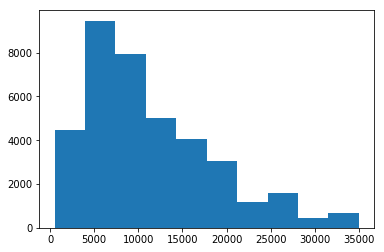

In [426]:
# We can make a few quick conclusions from the data above
# 1. The median loan amount for a charged off loan is higher.
# 2. The difference between median and mean for loan_amount is higher for charged off loans than fully paid. 2100>1200.
# This indicates that the higher amount loans have a tendency to be charged off.

# A histogram will be useful to see the distribution 

val1 = plt.hist(loan_stats.loan_amnt)
plt.show()

In [427]:
# we will try to create a categorical variable out of the loan amount now by binning it.
# deciding on a bin size of 3500

def amountBinningFunction(x):
    try:
       
        z = int((x-1)/3500)
        y = str(z*3500+1)+"-"+str((z+1)*3500)
        return y
    except: 
        return "N/A"

loan_stats['loan_range_index'] = loan_stats['loan_amnt'].apply(lambda x:int((x-1)/3500))
loan_stats['loan_range'] = loan_stats['loan_amnt'].apply(amountBinningFunction)



# for ease of analysis, we will create three dataframes by loan status. Current dataframe has minimal
# value with regards to insights it can provide
loan_current = loan_stats[loan_stats['loan_status'] == 'Current']
loan_paid = loan_stats[loan_stats['loan_status'] == 'Fully Paid']
loan_charged_off = loan_stats[loan_stats['loan_status'] == 'Charged Off']




In [428]:

# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_pivot = pd.pivot_table(loan_stats,index=['loan_range'],columns='loan_status', values='id', aggfunc=len)

# we calculate the ratio of charged off to paid
loan_stats_pivot['co_rate'] = loan_stats_pivot['Charged Off']/(loan_stats_pivot['Charged Off']+loan_stats_pivot['Current']+loan_stats_pivot['Fully Paid'])
loan_stats_pivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
loan_range,,,,
31501-35000,155,78,436,0.231689
28001-31500,85,50,308,0.191874
24501-28000,302,101,1191,0.189460
21001-24500,207,69,875,0.179844
17501-21000,502,171,2405,0.163093
14001-17500,627,166,3272,0.154244
7001-10500,1081,97,6994,0.132281
1-3500,527,41,3469,0.130542
10501-14000,674,212,4286,0.130317


# As one can see from the above pivot table, the rate of "Charge off" on the loan contnuously increases for loan amounts greater than USD 14000. This ratio is also greater than our sample's charge off rate of 14% 

In [429]:
loan_stats_pivot['binned_loan_amouts'] = loan_stats_pivot.index
loan_stats_pivot['amountorder'] = loan_stats_pivot['binned_loan_amouts'].apply(lambda x:int(x.split('-')[0]))
loan_stats_pivot.sort_values(by='amountorder',ascending=True,inplace=True)


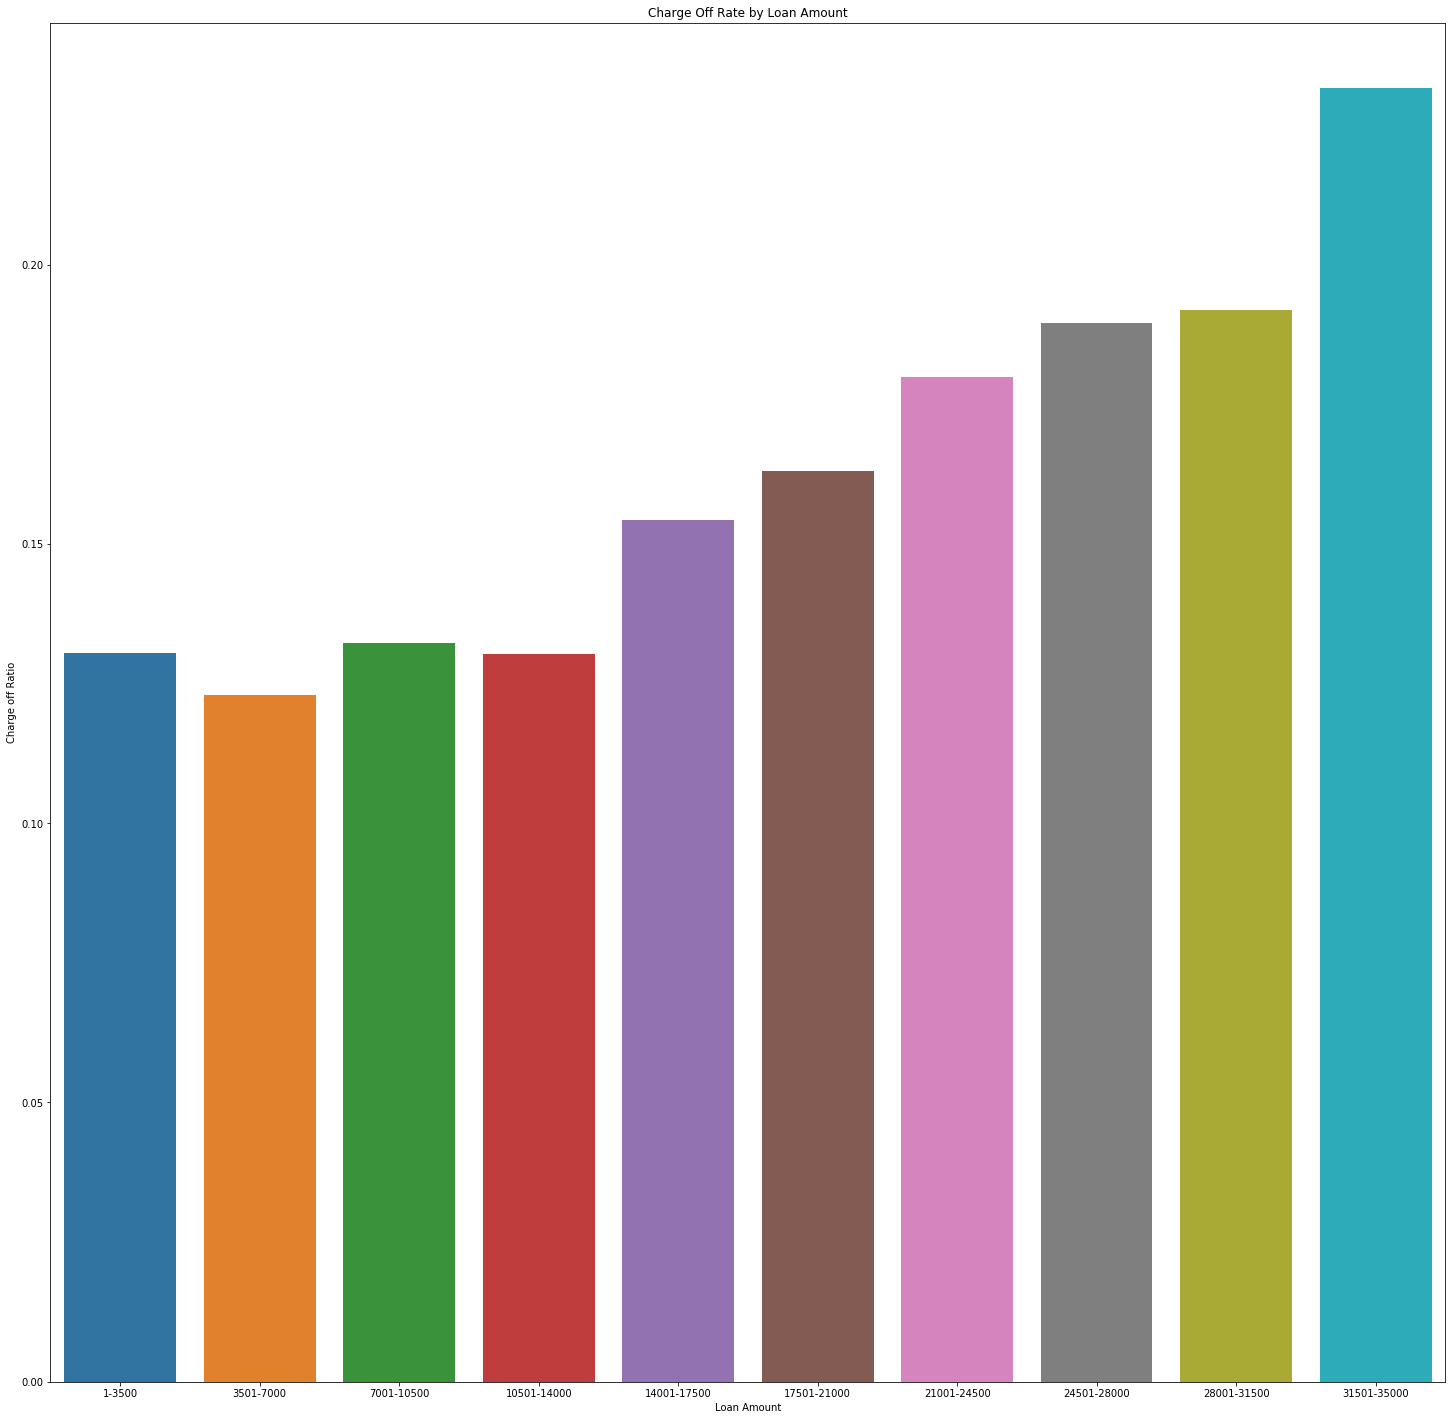

In [430]:
plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='binned_loan_amouts', y='co_rate', data=loan_stats_pivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='Loan Amount')


plt.title("Charge Off Rate by Loan Amount")

plt.show()

# as you can see by this plot below - the rate of default increases as amount increases


In [431]:
# the next field we will analyze is term

# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_termpivot = pd.pivot_table(loan_stats,index=['term'],columns='loan_status', values='id', aggfunc=len)
loan_stats_termpivot

# we calculate the ratio of charged off to paid
#loan_stats_termpivot['co_rate'] = loan_stats_termpivot['Charged Off']/(loan_stats_termpivot['Charged Off']+loan_stats_termpivot['Current'] +loan_stats_termpivot['Fully Paid'])
#loan_stats_termpivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid
term,,,
36,3008.0,NaN,24612.0
60,2311.0,1100.0,6782.0


In [432]:
# the next field we will analyze is term

# we will create a pivot table to identify the loan amount ranges where the ;
def amountsetNATo0(x):
    try:
       
        if np.isnan(x):
            return 0
        return x
    except: 
        return "N/A"

loan_stats_termpivot['Current']=loan_stats_termpivot['Current'].apply(amountsetNATo0)

# we calculate the ratio of charged off to paid
loan_stats_termpivot['co_rate'] = loan_stats_termpivot['Charged Off']/(loan_stats_termpivot['Charged Off']+loan_stats_termpivot['Current'] +loan_stats_termpivot['Fully Paid'])
loan_stats_termpivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
term,,,,
60,2311.0,1100.0,6782.0,0.226724
36,3008.0,0.0,24612.0,0.108907


# We see that loans that were requested for 60 months have twice the charge off rate than loans requested for 36 months. 


In [433]:
# interest rates are quantification of risk associated with a loan, as such is a result of
# our risk analysis. We cannot use it to assess risk. When a new loan is evaluated, we will not
# have the benefit of knowing the interest rate. 

# we suspect the installment will have a strong correlation with the loan amount.
loan_stats.corr()['installment'].sort_values(ascending=False)

installment                1.000000
loan_amnt                  0.927907
loan_range_index           0.920337
total_pymnt                0.851605
total_rec_prncp            0.844052
total_pymnt_inv            0.810524
total_rec_int              0.629269
last_pymnt_amnt            0.392355
annual_inc                 0.390348
revol_bal                  0.298059
int_rate                   0.281985
total_acc                  0.201909
open_acc                   0.151442
out_prncp                  0.126724
out_prncp_inv              0.126572
recoveries                 0.121268
emp_length_value           0.110597
term                       0.098091
revol_util                 0.096922
id                         0.079641
collection_recovery_fee    0.077489
dti                        0.067927
total_rec_late_fee         0.061289
inq_last_6mths             0.001444
mths_since_last_delinq    -0.000863
delinq_2yrs               -0.025848
pub_rec_bankruptcies      -0.030515
repayment_ratio           -0

As suspected the installment is strongly correlated to the loan amount, and we do need to conduct seperate univariate analysis on it. We will use the installment later for derived fields. 

In [434]:
# lets analyze emp_length and emp_length_value

loan_stats_emplengthpivot = pd.pivot_table(loan_stats,index=['emp_length'],columns='loan_status', values='id', aggfunc=len)


loan_stats_emplengthpivot['co_rate'] = loan_stats_emplengthpivot['Charged Off']/(loan_stats_emplengthpivot['Charged Off']+loan_stats_emplengthpivot['Current'] +loan_stats_emplengthpivot['Fully Paid'])
loan_stats_emplengthpivot.sort_values(by='co_rate',ascending=False)


loan_status,Charged Off,Current,Fully Paid,co_rate
emp_length,,,,
10+ years,1291,378,6853,0.151490
7 years,256,61,1406,0.148578
1 year,433,69,2573,0.140813
5 years,441,87,2642,0.139117
6 years,298,57,1799,0.138347
8 years,195,42,1182,0.137421
< 1 year,581,71,3607,0.136417
4 years,443,90,2757,0.134650
3 years,524,78,3326,0.133401


In [435]:
# this does not offer us much of a relation to go by.

# analysing home_ownership next

loan_stats_homepivot = pd.pivot_table(loan_stats,index=['home_ownership'],columns='loan_status', values='id', aggfunc=len)


loan_stats_homepivot['co_rate'] = loan_stats_homepivot['Charged Off']/(loan_stats_homepivot['Charged Off']+loan_stats_homepivot['Current'] +loan_stats_homepivot['Fully Paid'])
loan_stats_homepivot.sort_values(by='co_rate',ascending=False)


loan_status,Charged Off,Current,Fully Paid,co_rate
home_ownership,,,,
RENT,2647.0,408.0,14949.0,0.147023
OWN,407.0,78.0,2337.0,0.144224
MORTGAGE,2248.0,614.0,14030.0,0.133081
NONE,NaN,NaN,3.0,NaN
OTHER,17.0,NaN,75.0,NaN


In [436]:

loan_stats_delinq_2yrspivot = pd.pivot_table(loan_stats,index=['delinq_2yrs'],columns='loan_status', values='id', aggfunc=len)


loan_stats_delinq_2yrspivot['co_rate'] = loan_stats_delinq_2yrspivot['Charged Off']/(loan_stats_delinq_2yrspivot['Charged Off']+loan_stats_delinq_2yrspivot['Current'] +loan_stats_delinq_2yrspivot['Fully Paid'])
loan_stats_delinq_2yrspivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
delinq_2yrs,,,,
4,12.0,2.0,44.0,0.206897
2,117.0,14.0,515.0,0.181115
3,34.0,8.0,167.0,0.162679
1,480.0,90.0,2560.0,0.153355
0,4670.0,985.0,28075.0,0.138452
5,3.0,1.0,18.0,0.136364
6,1.0,NaN,9.0,NaN
7,1.0,NaN,3.0,NaN
8,1.0,NaN,1.0,NaN


In [437]:
# it looks from pivot table that a delinquency in the last two years is indicative of charged off
# creating a new categorical variable. However we need a modifid variable that indicates
# if the borrower has deliquent loans.
loan_stats['deliquent_in_last2yrs'] = loan_stats['delinq_2yrs']>0



In [438]:


loan_stats_delinqpivot = pd.pivot_table(loan_stats,index=['deliquent_in_last2yrs'],columns='loan_status', values='id', aggfunc=len)


loan_stats_delinqpivot['co_rate'] = loan_stats_delinqpivot['Charged Off']/(loan_stats_delinqpivot['Charged Off']+loan_stats_delinqpivot['Current'] +loan_stats_delinqpivot['Fully Paid'])
loan_stats_delinqpivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
deliquent_in_last2yrs,,,,
True,649,115,3319,0.158952
False,4670,985,28075,0.138452


In [439]:

loan_stats['publicRecordsExist'] = loan_stats['pub_rec']>0
loan_stats_pubrecords = pd.pivot_table(loan_stats,index=['publicRecordsExist'],columns='loan_status', values='id', aggfunc=len)


loan_stats_pubrecords['co_rate'] = loan_stats_pubrecords['Charged Off']/(loan_stats_pubrecords['Charged Off']+loan_stats_pubrecords['Current'] +loan_stats_pubrecords['Fully Paid'])
loan_stats_pubrecords.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
publicRecordsExist,,,,
True,449,46,1552,0.219345
False,4870,1054,29842,0.136163


# Deliquency in last two years is indicative of higher rate of charged off loans

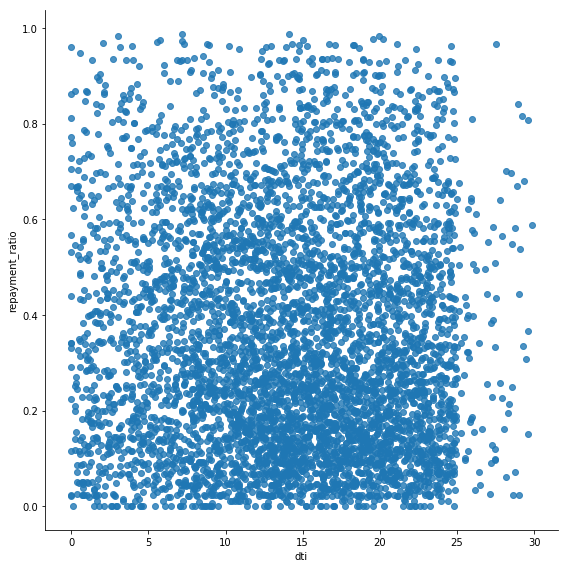

In [440]:
# going to analyze 
# dti
# installment
# annual_inc

# as a first step, a scatter plot between dti and repayment ratio for vari(a derived variable we created)
grid = sns.lmplot(x = 'dti' , y ='repayment_ratio',  size=8,data=loan_charged_off, fit_reg = False)
#grid.set(xscale="log", yscale="log")
plt.show()



# The scatter plot above indicates, that most people whose loans get charged off, seem to have dti on the higher end.


Text(0,0.5,'Frequency')

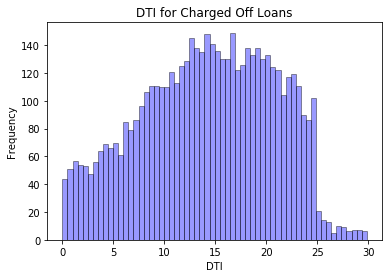

In [441]:
sns.distplot(loan_charged_off['dti'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('DTI for Charged Off Loans')
plt.xlabel('DTI')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

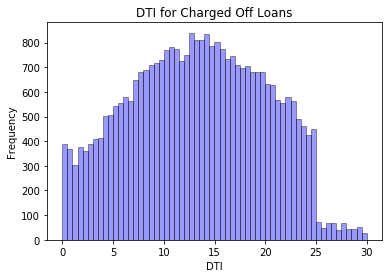

In [442]:
sns.distplot(loan_paid['dti'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('DTI for Charged Off Loans')
plt.xlabel('DTI')
plt.ylabel('Frequency')

In [443]:
def dtiBinningFunction(x):
    try:
       
        z = 3*int(x/3)
        y = str(z)+"-"+str(z+3)
        return y
    except: 
        return "N/A"

loan_stats['dt_range_index'] = loan_stats['dti'].apply(lambda x:int(x))
loan_stats['dti_range'] = loan_stats['dti'].apply(dtiBinningFunction)


# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_dtipivot = pd.pivot_table(loan_stats,index=['dti_range'],columns='loan_status', values='id', aggfunc=len)

loan_stats_dtipivot['Current']=loan_stats_dtipivot['Current'].apply(amountsetNATo0)
loan_stats_dtipivot['Fully Paid']=loan_stats_dtipivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_dtipivot['Charged Off']=loan_stats_dtipivot['Charged Off'].apply(amountsetNATo0)

# we calculate the ratio of charged off to paid
loan_stats_dtipivot['co_rate'] = loan_stats_dtipivot['Charged Off']/(loan_stats_dtipivot['Charged Off']+loan_stats_dtipivot['Current']+loan_stats_dtipivot['Fully Paid'])
loan_stats_dtipivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
dti_range,,,,
21-24,664,130,3217,0.165545
18-21,801,158,4002,0.161459
24-27,215,70,1132,0.151729
12-15,850,149,4831,0.145798
15-18,790,179,4462,0.145461
9-12,695,162,4499,0.129761
27-30,43,28,271,0.125731
6-9,564,104,3865,0.124421
0-3,306,49,2190,0.120236


In [444]:

loan_stats_dtipivot['binned_dti'] = loan_stats_dtipivot.index
loan_stats_dtipivot['dtiorder'] = loan_stats_dtipivot['binned_dti'].apply(lambda x:int(x.split('-')[0]))
loan_stats_dtipivot.sort_values(by='dtiorder',ascending=True,inplace=True)

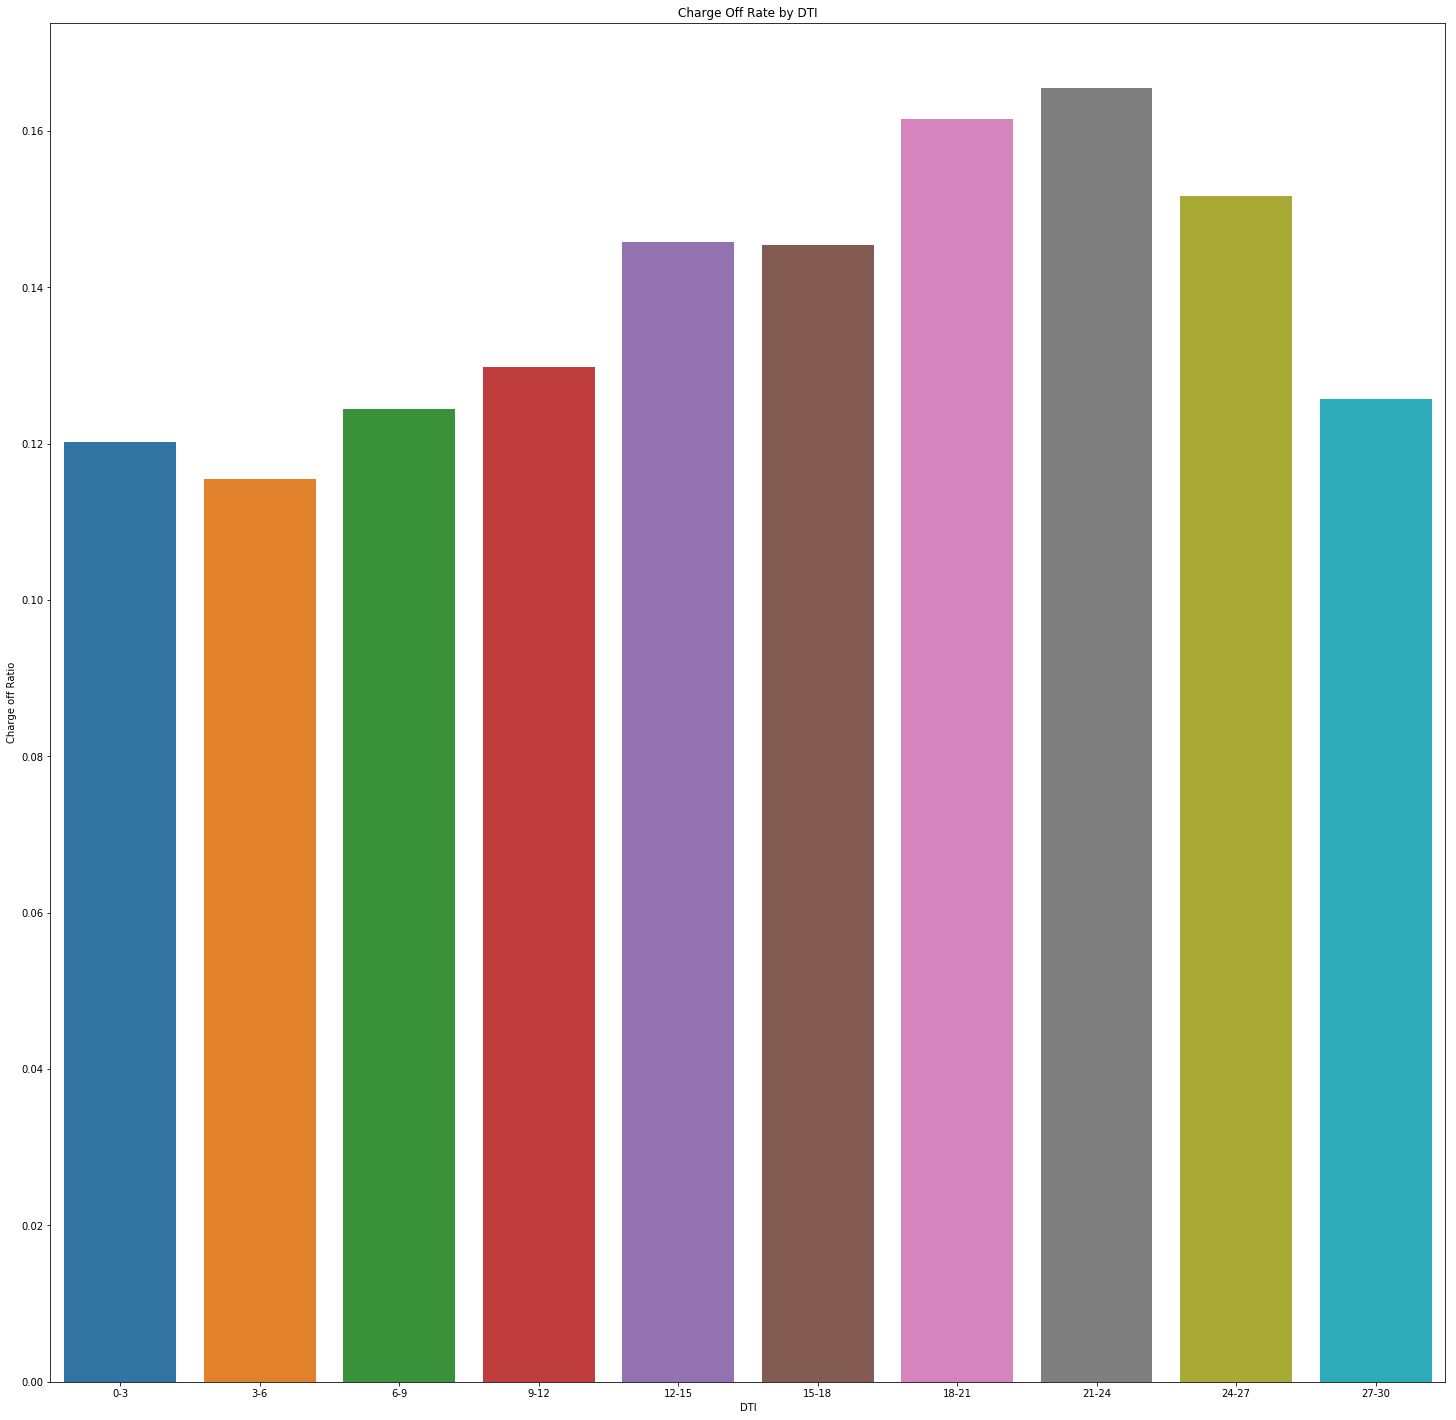

In [445]:
plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='binned_dti', y='co_rate', data=loan_stats_dtipivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='DTI')


plt.title("Charge Off Rate by DTI")

plt.show()

Again it is clear that in increase in DTI, above 12%, there is a clear increase in the incidence of higher charge off rate. 

In [446]:
#now we will look at the impact of the loan a customer applies on their repayment.
# we are going to create a new 

def increaseInDTIBinningFunction(x):
    try:
       
        z = 3*int(x/3)
        y = str(z)+"-"+str(z+3)
        return y
    except: 
        return "N/A"

loan_stats['dtiincr'] = loan_stats['installment']*1200/loan_stats['annual_inc']
loan_stats['dtiincr_range_index'] = loan_stats['dtiincr'].apply(lambda x:int(x))
loan_stats['dtiincr_range'] = loan_stats['dtiincr'].apply(increaseInDTIBinningFunction)


# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_dtiincrpivot = pd.pivot_table(loan_stats,index=['dtiincr_range'],columns='loan_status', values='id', aggfunc=len)

loan_stats_dtiincrpivot['Current']=loan_stats_dtiincrpivot['Current'].apply(amountsetNATo0)
loan_stats_dtiincrpivot['Fully Paid']=loan_stats_dtiincrpivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_dtiincrpivot['Charged Off']=loan_stats_dtiincrpivot['Charged Off'].apply(amountsetNATo0)

# we calculate the ratio of charged off to paid
loan_stats_dtiincrpivot['co_rate'] = loan_stats_dtiincrpivot['Charged Off']/(loan_stats_dtiincrpivot['Charged Off']+loan_stats_dtiincrpivot['Current']+loan_stats_dtiincrpivot['Fully Paid'])
loan_stats_dtiincrpivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
dtiincr_range,,,,
21-24,18.0,0.0,64.0,0.219512
18-21,67.0,0.0,242.0,0.216828
15-18,210.0,33.0,761.0,0.209163
27-30,1.0,0.0,4.0,0.200000
12-15,493.0,107.0,1940.0,0.194094
9-12,881.0,185.0,4079.0,0.171234
6-9,1329.0,329.0,7591.0,0.143691
24-27,2.0,1.0,13.0,0.125000
3-6,1539.0,323.0,10664.0,0.122864


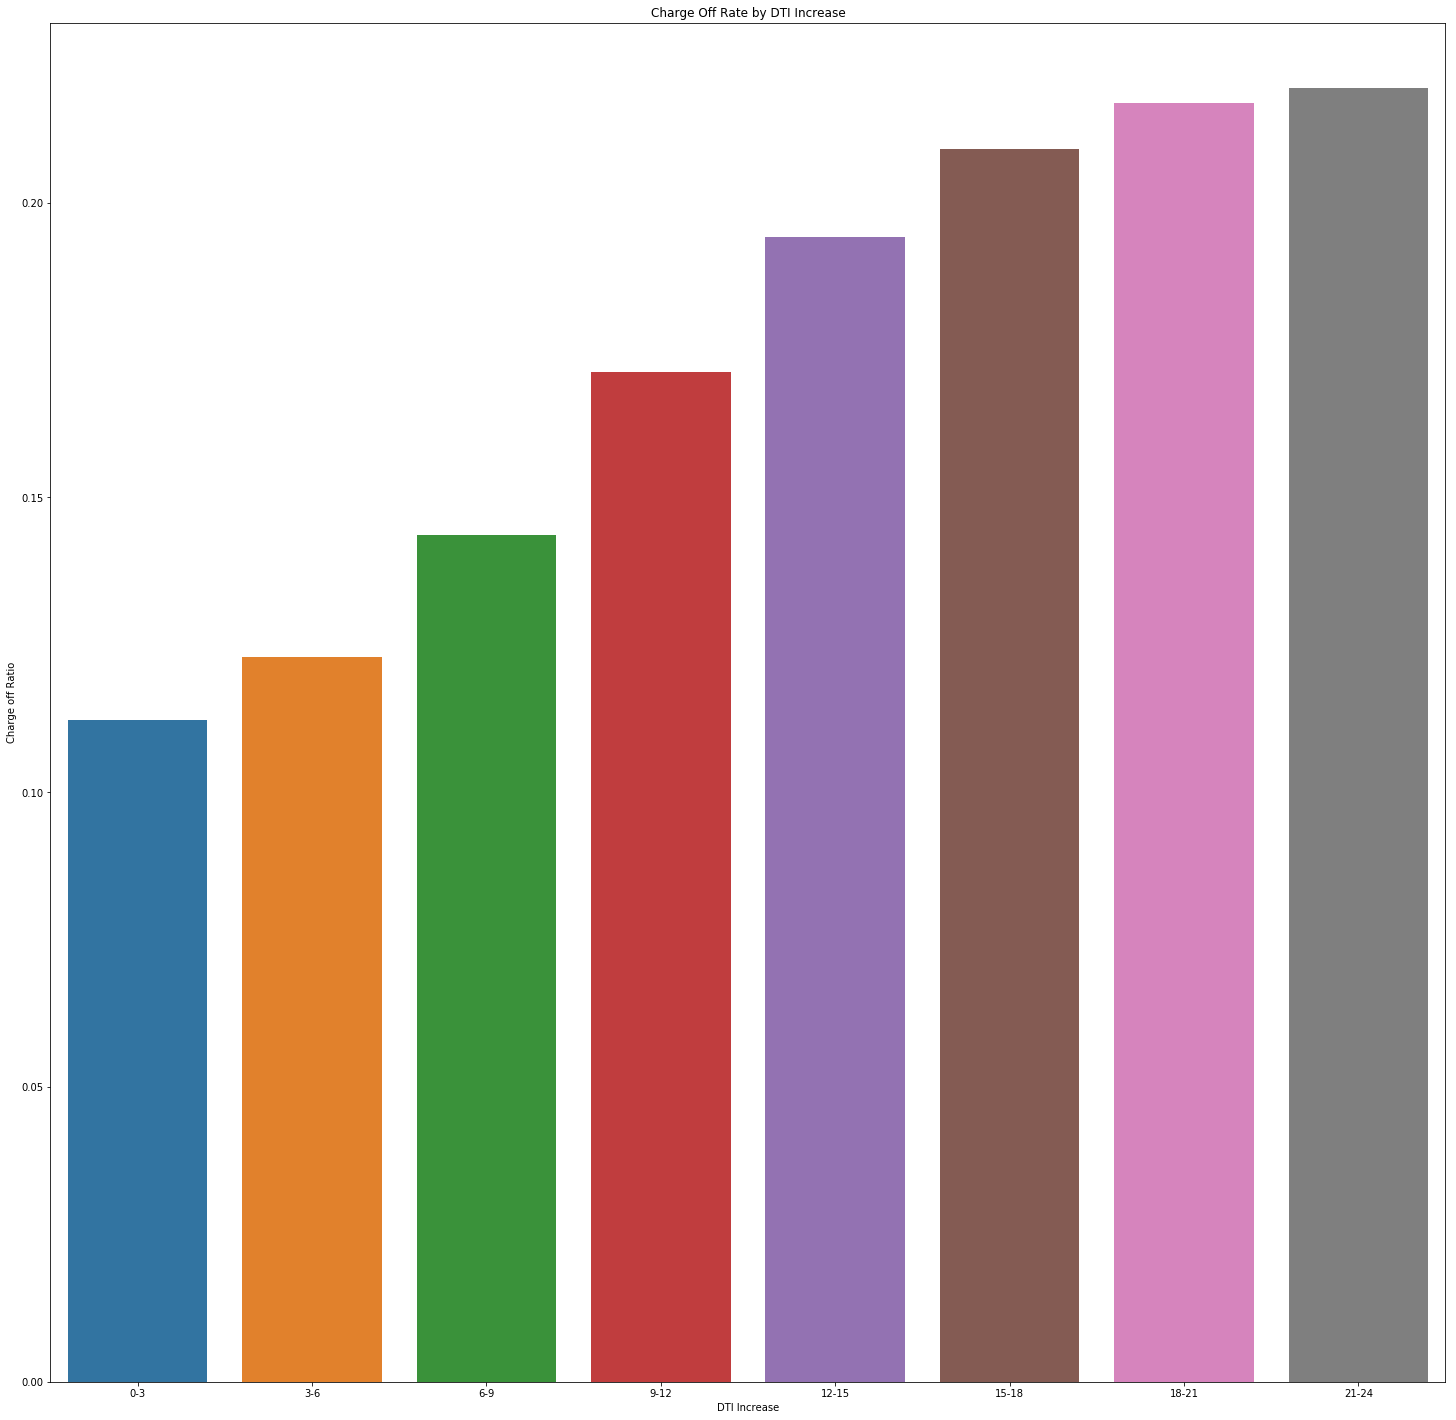

In [447]:
# the pivot table above clearly shows if the increase in DTI due the new loan is high
# the cances of the loan gettig charged off is high

# Also, we can safely remove the three rows for 27-30, 24-27, 30-33 as the sample size is too small to
# be meaningful

loan_stats_dtiincrpivot['binned_dtiincr'] = loan_stats_dtiincrpivot.index
loan_stats_dtiincrpivot['dtiincrorder'] = loan_stats_dtiincrpivot['binned_dtiincr'].apply(lambda x:int(x.split('-')[0]))
loan_stats_dtiincrpivot.sort_values(by='dtiincrorder',ascending=True,inplace=True)
loan_stats_dtiincrpivot = loan_stats_dtiincrpivot[0:8]


plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='binned_dtiincr', y='co_rate', data=loan_stats_dtiincrpivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='DTI Increase')


plt.title("Charge Off Rate by DTI Increase")

plt.show()

# the chart above clearly illustrates how an increase in DTI due to the proposed loan increases the odds of the loan being Charged Off.
This new dti_increase parameter combines the following variables into a business driven type :
1. Installment (Which alligns with the Amount)
2. Annual Income

For increase in DTI beyong 9% there is a higher than average chance of the loan getting charged off.


In [448]:
loan_stats['new_dti'] = loan_stats['dtiincr'] + loan_stats['dti']
loan_stats['new_dti_range_index'] = loan_stats['new_dti'].apply(lambda x:3*int(x/3))
loan_stats['new_dti_range'] = loan_stats['new_dti'].apply(increaseInDTIBinningFunction)


# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_newdtiincrpivot = pd.pivot_table(loan_stats,index=['new_dti_range'],columns='loan_status', values='id', aggfunc=len)

loan_stats_newdtiincrpivot['Current']=loan_stats_newdtiincrpivot['Current'].apply(amountsetNATo0)
loan_stats_newdtiincrpivot['Fully Paid']=loan_stats_newdtiincrpivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_newdtiincrpivot['Charged Off']=loan_stats_newdtiincrpivot['Charged Off'].apply(amountsetNATo0)

# we calculate the ratio of charged off to paid
loan_stats_newdtiincrpivot['co_rate'] = loan_stats_newdtiincrpivot['Charged Off']/(loan_stats_newdtiincrpivot['Charged Off']+loan_stats_newdtiincrpivot['Current']+loan_stats_newdtiincrpivot['Fully Paid'])
loan_stats_newdtiincrpivot.sort_values(by='co_rate',ascending=False)

loan_status,Charged Off,Current,Fully Paid,co_rate
new_dti_range,,,,
33-36,267,52,1020,0.199403
30-33,433,109,1887,0.178263
36-39,122,32,536,0.176812
27-30,572,127,2766,0.165079
24-27,702,127,3479,0.162953
39-42,35,17,167,0.159817
21-24,710,142,3951,0.147824
18-21,670,138,4066,0.137464
15-18,626,118,4000,0.131956


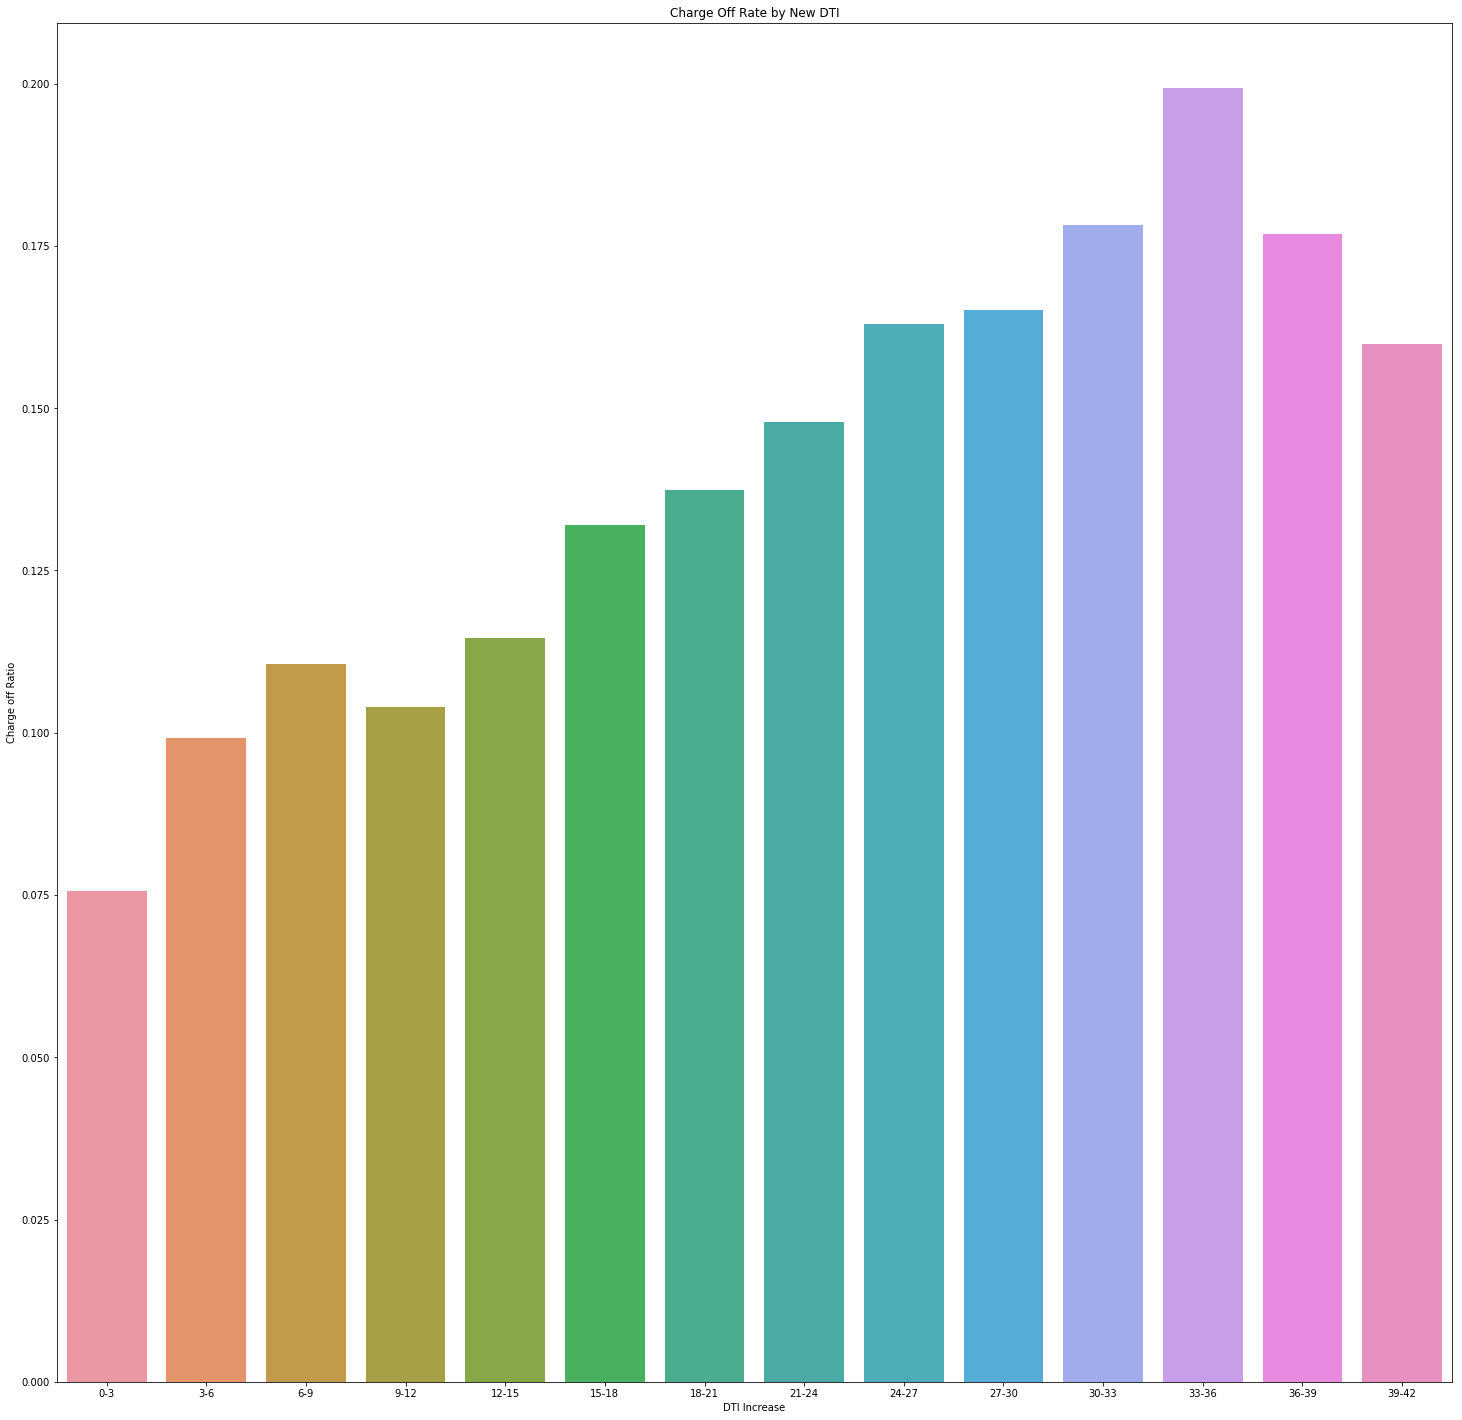

In [449]:

# we can safely remove the 42-45 row because of the small size

loan_stats_newdtiincrpivot['binned_newdti'] = loan_stats_newdtiincrpivot.index
loan_stats_newdtiincrpivot['newdtiorder'] = loan_stats_newdtiincrpivot['binned_newdti'].apply(lambda x:int(x.split('-')[0]))
loan_stats_newdtiincrpivot.sort_values(by='newdtiorder',ascending=True,inplace=True)
loan_stats_newdtiincrpivot = loan_stats_newdtiincrpivot[0:14]


plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='binned_newdti', y='co_rate', data=loan_stats_newdtiincrpivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='DTI Increase')


plt.title("Charge Off Rate by New DTI")

plt.show()

In [450]:
loan_stats.isna()['revol_util']

0        False
1        False
3        False
4        False
5        False
6        False
7        False
8        False
10       False
11       False
12       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
31       False
32       False
33       False
         ...  
39679    False
39680    False
39681    False
39682    False
39683    False
39684    False
39685    False
39686    False
39687    False
39688    False
39689    False
39690    False
39691    False
39694    False
39695    False
39696    False
39697    False
39698    False
39699    False
39701    False
39702    False
39704    False
39705    False
39708    False
39709    False
39710    False
39711    False
39712    False
39714    False
39716    False
Name: revol_util, Length: 37813, dtype: bool

In [451]:

def revolUtilBinningFunction(x):
    try:
       
        z = 5*int(x/5)
        y = str(z)+"-"+str(z+5)
        return y
    except: 
        return "N/A"



loan_revol_util = loan_stats.loc[~loan_stats.isna()['revol_util']] 
#loan_stats.dropna(subset=['revol_util'])
loan_revol_util['revol_util_range_index'] = loan_revol_util['revol_util'].apply(lambda x:5*int(x/5))
loan_revol_util['revol_util_range'] = loan_revol_util['revol_util'].apply(revolUtilBinningFunction)


# we will create a pivot table to identify the loan amount ranges where the ;
loan_stats_revolutilpivot = pd.pivot_table(loan_revol_util,index=['revol_util_range'],columns='loan_status', values='id', aggfunc=len)

loan_stats_revolutilpivot['Current']=loan_stats_revolutilpivot['Current'].apply(amountsetNATo0)
loan_stats_revolutilpivot['Fully Paid']=loan_stats_revolutilpivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_revolutilpivot['Charged Off']=loan_stats_revolutilpivot['Charged Off'].apply(amountsetNATo0)

# we calculate the ratio of charged off to paid
loan_stats_revolutilpivot['co_rate'] = loan_stats_revolutilpivot['Charged Off']/(loan_stats_revolutilpivot['Charged Off']+loan_stats_revolutilpivot['Current']+loan_stats_revolutilpivot['Fully Paid'])
loan_stats_revolutilpivot.sort_values(by='co_rate',ascending=False)

C:\Users\vivpadmanabhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\vivpadmanabhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


loan_status,Charged Off,Current,Fully Paid,co_rate
revol_util_range,,,,
95-100,302,37,1075,0.213579
90-95,336,52,1235,0.207024
85-90,308,71,1304,0.183007
80-85,337,53,1460,0.182162
70-75,347,69,1545,0.176951
75-80,308,61,1520,0.163049
65-70,329,70,1631,0.162069
55-60,318,58,1737,0.150497
60-65,302,77,1678,0.146816


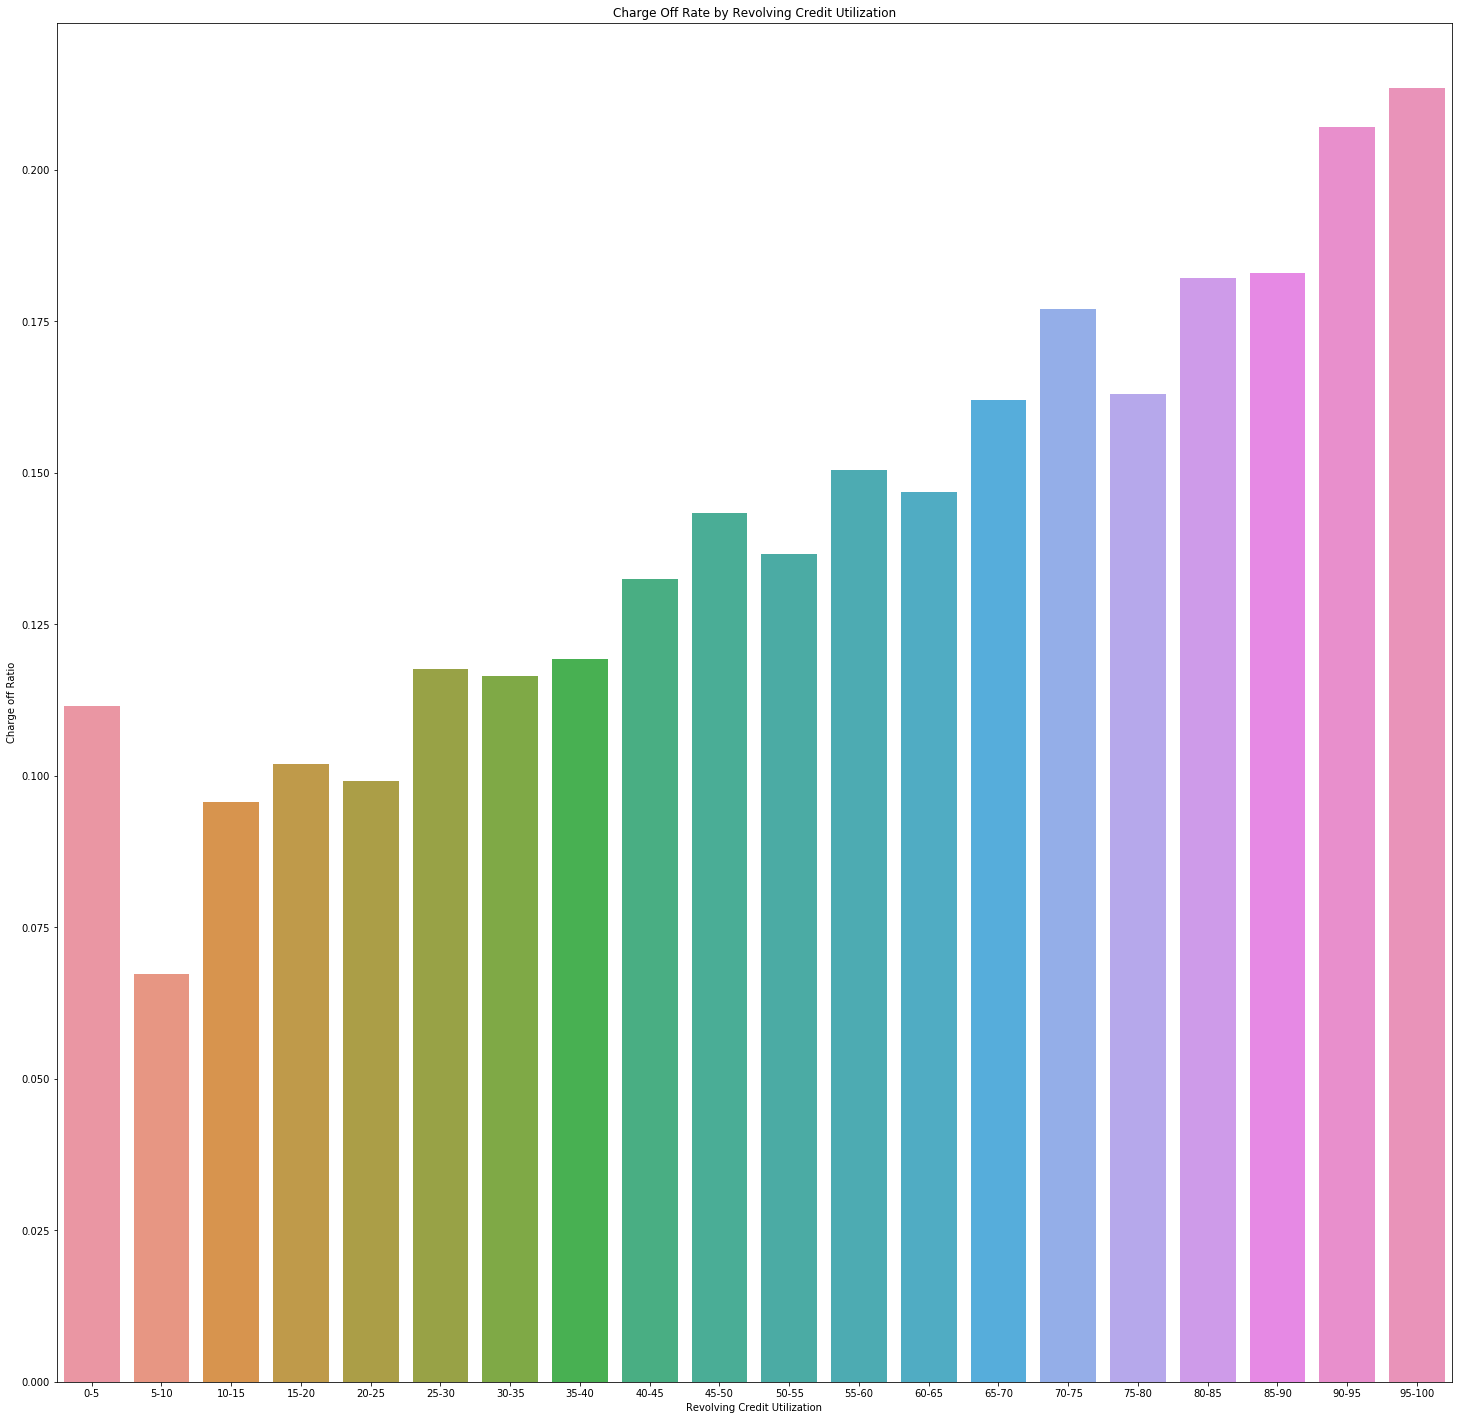

In [452]:
loan_stats_revolutilpivot['binned_revolutil'] = loan_stats_revolutilpivot.index
loan_stats_revolutilpivot['revolutilorder'] = loan_stats_revolutilpivot['binned_revolutil'].apply(lambda x:int(x.split('-')[0]))
loan_stats_revolutilpivot.sort_values(by='revolutilorder',ascending=True,inplace=True)



plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='binned_revolutil', y='co_rate', data=loan_stats_revolutilpivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='Revolving Credit Utilization')


plt.title("Charge Off Rate by Revolving Credit Utilization")

plt.show()




Revol_util - the higher the revol_util, the higher the chance of the loan being charged off

In [453]:
loan_stats_purposepivot = pd.pivot_table(loan_stats,index=['purpose'],columns='loan_status', values='id', aggfunc=len)

loan_stats_purposepivot['Current']=loan_stats_purposepivot['Current'].apply(amountsetNATo0)
loan_stats_purposepivot['Fully Paid']=loan_stats_purposepivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_purposepivot['Charged Off']=loan_stats_purposepivot['Charged Off'].apply(amountsetNATo0)

loan_stats_purposepivot['co_rate'] = loan_stats_purposepivot['Charged Off']/(loan_stats_purposepivot['Charged Off']+loan_stats_purposepivot['Current'] +loan_stats_purposepivot['Fully Paid'])
loan_stats_purposepivot.sort_values(by='co_rate',ascending=True, inplace=True)

loan_stats_purposepivot


loan_status,Charged Off,Current,Fully Paid,co_rate
purpose,,,,
major_purchase,204.0,35.0,1818.0,0.099174
wedding,91.0,20.0,803.0,0.099562
car,150.0,49.0,1267.0,0.102319
credit_card,523.0,101.0,4318.0,0.105828
home_improvement,327.0,94.0,2353.0,0.117880
vacation,49.0,6.0,304.0,0.136490
debt_consolidation,2667.0,571.0,14736.0,0.148381
medical,97.0,10.0,542.0,0.149461
moving,80.0,7.0,444.0,0.150659


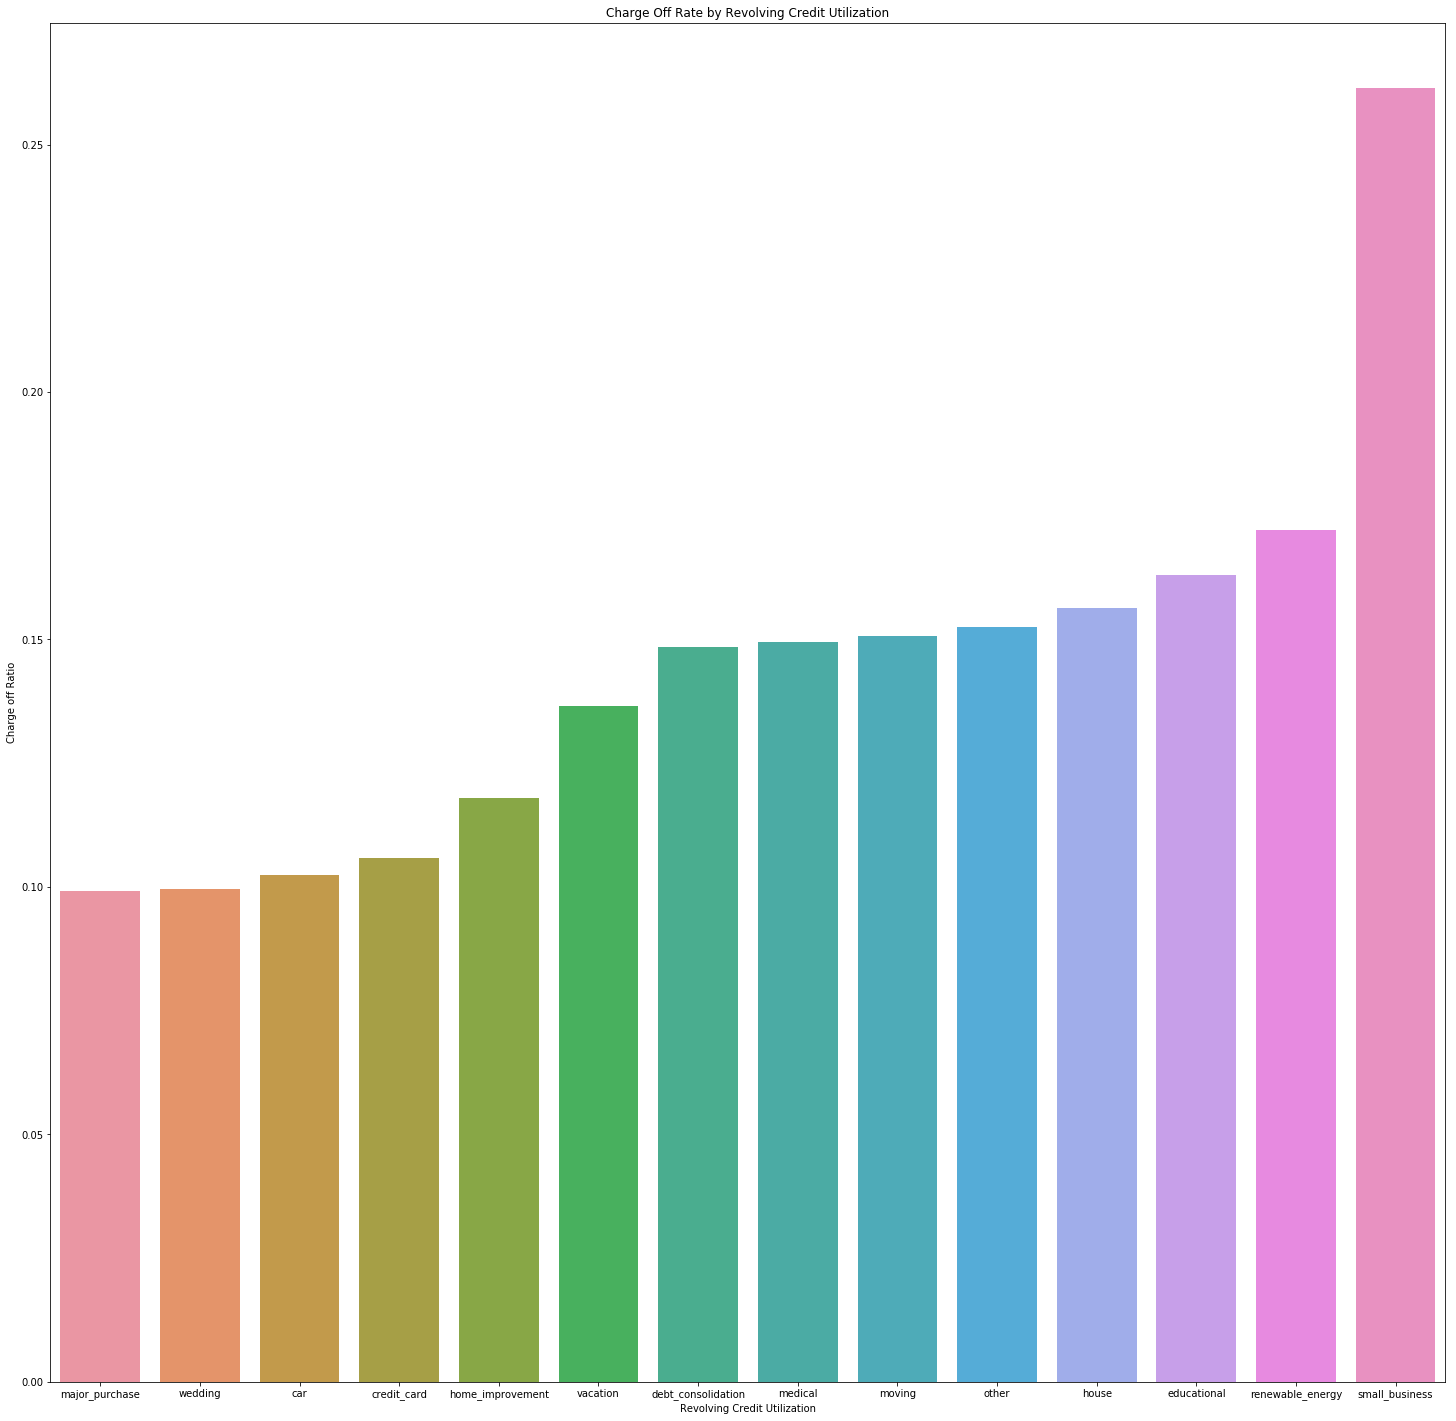

In [454]:
loan_stats_purposepivot['purpose_ofloan']=loan_stats_purposepivot.index

plt.figure(figsize=(25,25))

corateplot = sns.barplot(x='purpose_ofloan', y='co_rate', data=loan_stats_purposepivot)
corateplot.set(ylabel='Charge off Ratio', xlabel='Revolving Credit Utilization')


plt.title("Charge Off Rate by Revolving Credit Utilization")

plt.show()

In [455]:
loan_stats_zip_codepivot = pd.pivot_table(loan_stats,index=['zip_code'],columns='loan_status', values='id', aggfunc=len)

loan_stats_zip_codepivot['Current']=loan_stats_zip_codepivot['Current'].apply(amountsetNATo0)
loan_stats_zip_codepivot['Fully Paid']=loan_stats_zip_codepivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_zip_codepivot['Charged Off']=loan_stats_zip_codepivot['Charged Off'].apply(amountsetNATo0)
loan_stats_zip_codepivot['totalCount'] = (loan_stats_zip_codepivot['Charged Off']+loan_stats_zip_codepivot['Current'] +loan_stats_zip_codepivot['Fully Paid'])
loan_stats_zip_codepivot['co_rate'] = loan_stats_zip_codepivot['Charged Off']/(loan_stats_zip_codepivot['Charged Off']+loan_stats_zip_codepivot['Current'] +loan_stats_zip_codepivot['Fully Paid'])
loan_stats_zip_codepivot.sort_values(by='totalCount',ascending=False, inplace=True)

# there are many zip codes with very few data points, and including them will 
# introduce inaccuracies in our model.
loan_stats_zip_codepivot = loan_stats_zip_codepivot[loan_stats_zip_codepivot['totalCount']>=30]
loan_stats_zip_codepivot = loan_stats_zip_codepivot[loan_stats_zip_codepivot['co_rate']>=0.12]
loan_stats_zip_codepivot.sort_values(by='co_rate',ascending=False, inplace=True)

loan_stats_zip_codepivot



loan_status,Charged Off,Current,Fully Paid,totalCount,co_rate
zip_code,,,,,
912,15.0,1.0,30.0,46.0,0.326087
935,31.0,1.0,67.0,99.0,0.313131
986,15.0,1.0,39.0,55.0,0.272727
206,16.0,1.0,42.0,59.0,0.271186
321,16.0,1.0,43.0,60.0,0.266667
082,13.0,2.0,34.0,49.0,0.265306
106,8.0,0.0,24.0,32.0,0.250000
072,9.0,1.0,26.0,36.0,0.250000
484,8.0,0.0,24.0,32.0,0.250000


In [456]:
# We will analyze the grade of the loan now. The grade is presumably obtained by the current model

loan_stats_gradepivot = pd.pivot_table(loan_stats,index=['grade'],columns='loan_status', values='id', aggfunc=len)

loan_stats_gradepivot['Current']=loan_stats_gradepivot['Current'].apply(amountsetNATo0)
loan_stats_gradepivot['Fully Paid']=loan_stats_gradepivot['Fully Paid'].apply(amountsetNATo0)
loan_stats_gradepivot['Charged Off']=loan_stats_gradepivot['Charged Off'].apply(amountsetNATo0)

loan_stats_gradepivot['co_rate'] = loan_stats_gradepivot['Charged Off']/(loan_stats_gradepivot['Charged Off']+loan_stats_gradepivot['Current'] +loan_stats_gradepivot['Fully Paid'])
loan_stats_gradepivot.sort_values(by='co_rate',ascending=False, inplace=True)

loan_stats_gradepivot


loan_status,Charged Off,Current,Fully Paid,co_rate
grade,,,,
G,95,16,184,0.322034
F,301,66,613,0.307143
E,675,169,1843,0.251210
D,1063,214,3761,0.210996
C,1277,257,6160,0.165973
B,1343,339,9774,0.117231
A,565,39,9059,0.058470


# Results from Segmented Univariate Analysis
We have identified some key variables to identify higher risk loans and borrowers

1. Term of the Loan
2. Purpose of the Loan
3. Existence of Public Records (Derived Variable)
4. Existence of Deliquencies in the last two years (Derived Variable)
5. Variables related to or derived from amount of the loan, and the borrowers annual income
    5.1 Current Debt to Income Ratio
    5.2 Increate in Debt to Income Ratio this new loan will cause
    5.3 Final Debt to Income Ratio this loan will result in
6. The utilization of the borrowers Revolving accounts
7. We also identified some high risk zip codes for our analysis.
8. The loan grade as classified.
    

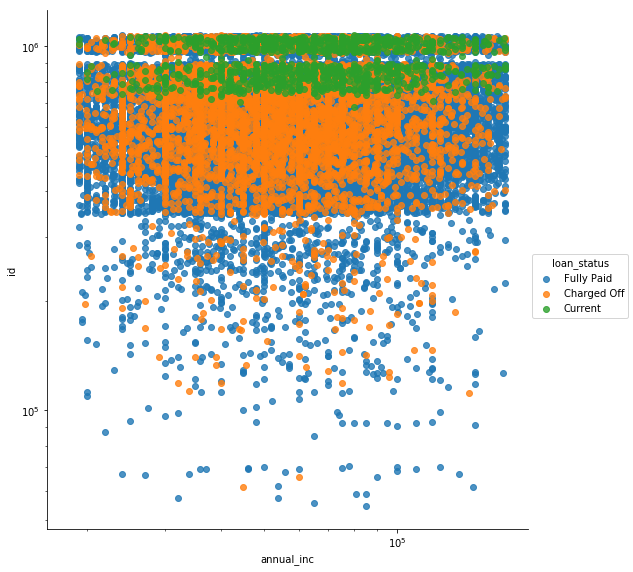

In [457]:
# Scatter plot for individual income to check for outliers (can eliminate individuals beyond 99.5 percentile?)
import matplotlib.pyplot as plt
import seaborn as sns

grid = sns.lmplot(x = 'annual_inc' , y ='id', hue='loan_status', size=8,data=loan_stats, fit_reg = False)
grid.set(xscale="log", yscale="log")

plt.show()

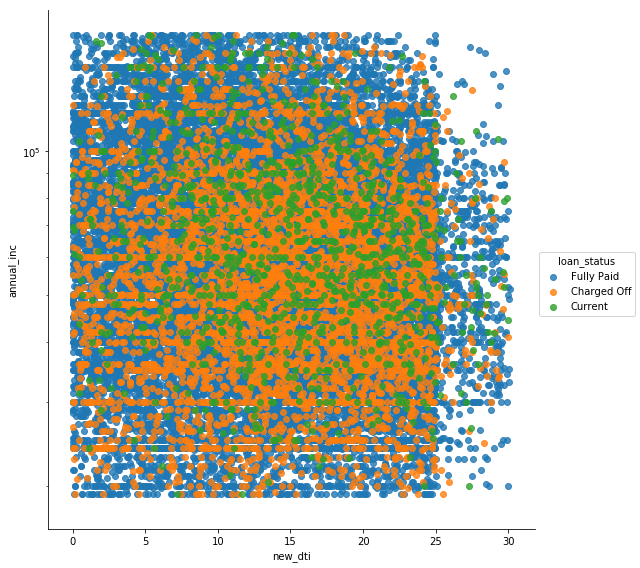

In [458]:
# Scatter plot for individual income to check for outliers (can eliminate individuals beyond 99.5 percentile?)
import matplotlib.pyplot as plt
import seaborn as sns


# Create a new derived business driven variable
loan_stats['new_dti']=loan_stats['dti']+loan_stats['installment']*12/loan_stats['annual_inc']

grid = sns.lmplot(x='new_dti',y = 'annual_inc' , hue='loan_status', size=8,data=loan_stats, fit_reg = False)
grid.set( yscale="log")

plt.show()

In [459]:

val1 = sns.boxplot(x="loan_status", y="emp_length", data=loan_stats)
#val1.set(yscale="log")
plt.show()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [460]:
loan_stats.corr()['loan_status_value'].sort_values()
loan_stats['recovery_rate']=loan_stats['total_rec_prncp']/loan_stats['funded_amnt']

KeyError: 'loan_status_value'

In [461]:
# Remove outliers for annual income from the dataframe
#loan_stats = loan_stats[loan_stats['annual_inc'] <= 200000]
#loan_stats['annual_inc'].describe()

loan_stats_wocurrent = loan_stats[~(loan_stats['loan_status']=='Current')]

In [462]:
loan_stats_wocurrent.corr()['recovery_rate'].sort_values()

KeyError: 'recovery_rate'

In [463]:
#Check values of 'loan_status' column
loan_stats['loan_status'].value_counts()

Fully Paid     31394
Charged Off     5319
Current         1100
Name: loan_status, dtype: int64

In [464]:
# Checkpoint 2: Segregate data pertaining to loan amount - 'paid', 'current', and 'charged-off' in three different
# dataframes for the purpose of univariate analysis.

# get data pertaining to value 'Charged off' in a seperate dataframe '
loan_charged_off = loan_stats[loan_stats['loan_status'] == 'Charged Off']
loan_charged_off.describe()

,id,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_value,repayment_ratio,loan_range_index,dt_range_index,dtiincr,dtiincr_range_index,new_dti,new_dti_range_index
count,5.319000e+03,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,2044.000000,...,5319.000000,5208.00000,5136.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000
mean,7.015003e+05,12267.616093,46.427524,13.832187,340.133510,59987.633237,14.168488,0.169205,1.053205,36.468689,...,331.304535,0.06874,5.263240,0.351943,2.968979,13.676255,7.380520,6.885129,14.242294,20.051889
std,2.160289e+05,7953.813523,11.897644,3.652102,212.803636,28881.466655,6.553536,0.534221,1.151870,22.685910,...,539.038599,0.25455,3.443694,0.244178,2.273591,6.547689,4.230335,4.235473,6.557102,8.123942
min,6.141900e+04,1000.000000,36.000000,5.420000,23.010000,19200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.407280,0.000000,0.014460,0.000000
25%,5.356610e+05,6000.000000,36.000000,11.350000,175.000000,39000.000000,9.265000,0.000000,0.000000,18.000000,...,120.640000,0.00000,2.000000,0.145261,1.000000,9.000000,4.055987,4.000000,9.348922,15.000000
50%,7.028810e+05,10000.000000,36.000000,13.610000,299.980000,54000.000000,14.470000,0.000000,1.000000,35.000000,...,245.800000,0.00000,5.000000,0.301246,2.000000,14.000000,6.678340,6.000000,14.550231,21.000000
75%,8.594495e+05,16750.000000,60.000000,16.400000,460.100000,75000.000000,19.435000,0.000000,2.000000,53.000000,...,410.360000,0.00000,10.000000,0.526537,4.000000,19.000000,10.056219,10.000000,19.507169,27.000000
max,1.077430e+06,35000.000000,60.000000,24.400000,1305.190000,175000.000000,29.850000,8.000000,8.000000,107.000000,...,12818.380000,2.00000,10.000000,0.988446,9.000000,29.000000,29.755846,29.000000,29.949752,42.000000


In [465]:
# get data pertaining to value 'Fully Paid' in a seperate dataframe '
loan_paid = loan_stats[loan_stats['loan_status'] == 'Fully Paid']


loan_paid.describe()

,id,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_value,repayment_ratio,loan_range_index,dt_range_index,dtiincr,dtiincr_range_index,new_dti,new_dti_range_index
count,3.139400e+04,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,11003.000000,...,31394.000000,30861.000000,30710.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000,31394.000000
mean,6.733501e+05,10829.074823,41.184685,11.586961,318.921460,65318.745431,13.304693,0.142065,0.836051,36.005180,...,3148.613439,0.040051,5.061381,0.986479,2.551188,12.811429,6.454441,5.955023,13.369237,18.251609
std,2.076116e+05,7013.004790,9.876973,3.593020,201.296041,30999.765411,6.652967,0.484868,1.049551,21.925181,...,4674.457095,0.196576,3.388426,0.068215,2.017209,6.649872,3.887463,3.897422,6.658533,8.209916
min,5.473400e+04,500.000000,36.000000,5.420000,16.080000,19200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.101250,0.000000,0.000000,0.216686,0.000000,0.007604,0.000000
25%,5.097930e+05,5500.000000,36.000000,8.490000,167.882500,42000.000000,8.190000,0.000000,0.000000,18.000000,...,260.047500,0.000000,2.000000,1.000000,1.000000,8.000000,3.497704,3.000000,8.249686,12.000000
50%,6.516625e+05,9600.000000,36.000000,11.490000,276.890000,60000.000000,13.390000,0.000000,1.000000,34.000000,...,873.175000,0.000000,4.000000,1.000000,2.000000,13.000000,5.693854,5.000000,13.446514,18.000000
75%,8.235932e+05,15000.000000,36.000000,13.980000,416.242500,81204.000000,18.550000,0.000000,1.000000,52.000000,...,4276.180000,0.000000,9.000000,1.000000,4.000000,18.000000,8.636000,8.000000,18.608255,24.000000
max,1.077501e+06,35000.000000,60.000000,24.110000,1288.100000,175000.000000,29.990000,11.000000,8.000000,120.000000,...,36115.200000,2.000000,10.000000,1.000012,9.000000,29.000000,32.026200,32.000000,30.100318,42.000000


In [466]:
# following columns are not needed for this dataset as the values are not available 
loan_paid=loan_paid.drop('recoveries', axis =1)
loan_paid=loan_paid.drop('collection_recovery_fee', axis =1)
loan_paid=loan_paid.drop('out_prncp', axis =1)
loan_paid=loan_paid.drop('out_prncp_inv', axis =1)

In [467]:
# get data pertaining to value 'Current' in a seperate dataframe '
loan_current = loan_stats[loan_stats['loan_status'] == 'Current']
loan_current.describe()

,id,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_value,repayment_ratio,loan_range_index,dt_range_index,dtiincr,dtiincr_range_index,new_dti,new_dti_range_index
count,1.100000e+03,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,353.000000,...,1100.000000,1100.000000,1061.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,9.128227e+05,16894.818182,60.0,14.960745,391.483618,70549.787473,14.895873,0.140909,0.784545,36.807365,...,393.520000,0.037273,6.158341,0.876238,4.260909,14.396364,7.294074,6.789091,14.968813,20.661818
std,1.044956e+05,8534.378996,0.0,3.570463,201.403866,32494.012024,6.688349,0.479952,1.022912,21.739607,...,203.288198,0.198886,3.464564,0.083380,2.398460,6.690424,3.683018,3.688394,6.696368,8.381389
min,6.829520e+05,1000.000000,60.0,6.000000,21.740000,19200.000000,0.000000,0.000000,0.000000,1.000000,...,21.740000,0.000000,1.000000,0.455471,0.000000,0.000000,0.314143,0.000000,0.008997,0.000000
25%,8.210448e+05,12000.000000,60.0,11.990000,257.520000,47000.000000,9.932500,0.000000,0.000000,19.000000,...,258.470000,0.000000,3.000000,0.845526,3.000000,9.000000,4.507358,4.000000,10.038091,15.000000
50%,8.870075e+05,15325.000000,60.0,14.270000,364.695000,63687.000000,15.180000,0.000000,0.000000,34.000000,...,368.080000,0.000000,6.000000,0.885340,4.000000,15.000000,6.819083,6.000000,15.240942,21.000000
75%,1.015967e+06,22400.000000,60.0,17.580000,514.892500,87000.000000,20.160000,0.000000,1.000000,52.000000,...,516.605000,0.000000,10.000000,0.930068,6.000000,20.000000,9.662010,9.000000,20.235466,27.000000
max,1.075358e+06,35000.000000,60.0,23.910000,981.450000,175000.000000,29.950000,5.000000,8.000000,103.000000,...,1203.560000,2.000000,10.000000,0.999004,9.000000,29.000000,24.469375,24.000000,29.998086,42.000000


In [468]:
loan_charged_off.corr()['repayment_rate'].sort_values()

KeyError: 'recovery_rate'

In [469]:
# Segmented univariate analysis - model

# target_val = annual_income
# impact_by = 'emp_lenght', 'home_ownership','purpose','addr-state

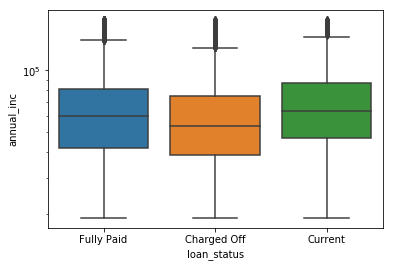

In [470]:
#A - Segmented Univatiate Analysis - How average of 'annual_income' compares with the 3 sub-cats - 
# (paid' current, charged off)
loan_stats['annual_inc'].mean()
val = sns.boxplot(x="loan_status", y="annual_inc", data=loan_stats)
val.set(yscale="log")
plt.show()


# Observation - The plot below indicates that the average income of 'Charged-off' cases is lower than the other 2 cases.
# Also, the income of the other two group is relatively better

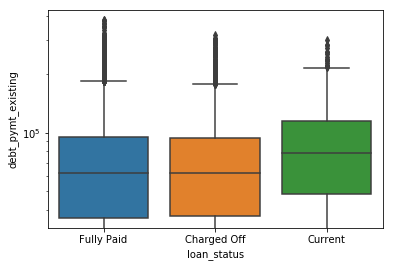

In [471]:
#B - DTI played out across 3 sub-cats
# First create a derived column called 'debt_pymt_existing' = [dti]*[annual_inc /12]
loan_stats['debt_pymt_existing'] = (loan_stats['dti']*loan_stats['annual_inc'])/12
loan_stats['debt_pymt_existing'].mean()
val1 = sns.boxplot(x="loan_status", y="debt_pymt_existing", data=loan_stats)
val1.set(yscale="log")
plt.show()

In [472]:
loan_stats['debt_pymt_existing'].describe()

count     37813.000000
mean      70807.593802
std       47490.939220
min           0.000000
25%       36694.395833
50%       62500.000000
75%       95511.000000
max      378083.333333
Name: debt_pymt_existing, dtype: float64

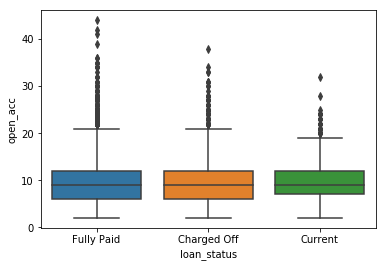

In [473]:
# C - No. of open credit lines cross 3 sub-cats
val2 = sns.boxplot(x="loan_status", y="open_acc", data=loan_stats)
#val2.set(yscale="log")
plt.show()

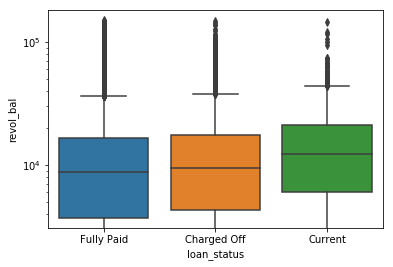

In [474]:
# D - No. of open credit balance cross 3 sub-cats
val3 = sns.boxplot(x="loan_status", y="revol_bal", data=loan_stats)
val3.set(yscale="log")
plt.show()


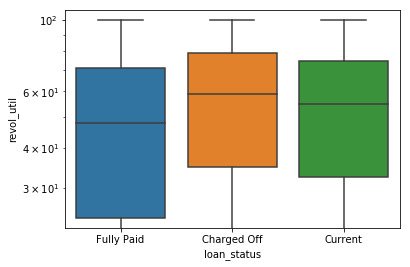

In [475]:
#Revolving line utilization rate, or the amount of credit the borrower is using relative to all
#available revolving credit.

val4 = sns.boxplot(x="loan_status", y="revol_util", data=loan_stats)
#loan_stats['revol_util'].describe()
val4.set(yscale="log")
plt.show()

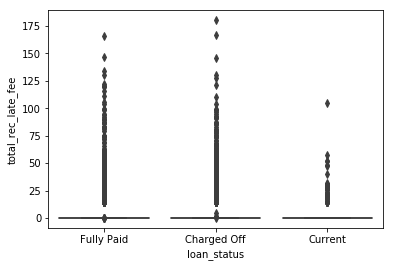

In [476]:
#val5 = sns.boxplot(x="loan_status", y="total_acc", data=loan_stats)
#val6 = sns.boxplot(x="loan_status", y="out_prncp", data=loan_stats)
#val6 = sns.boxplot(x="loan_status", y="total_rec_prncp", data=loan_stats)
val6 = sns.boxplot(x="loan_status", y="total_rec_late_fee", data=loan_stats)
#loan_stats['revol_util'].describe()
#val6.set(yscale="log")
plt.show()


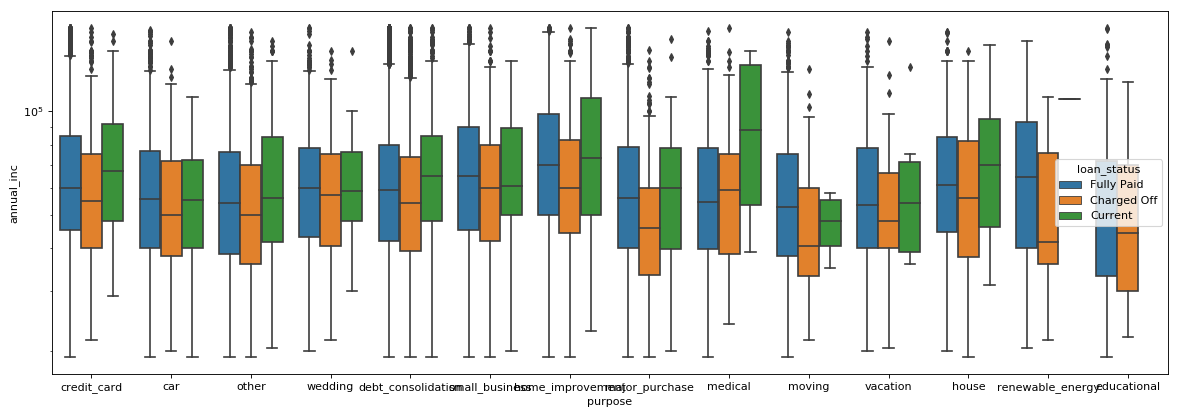

In [477]:
# create figure object
plt.figure(num=None,figsize=(18,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="purpose", y="annual_inc",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

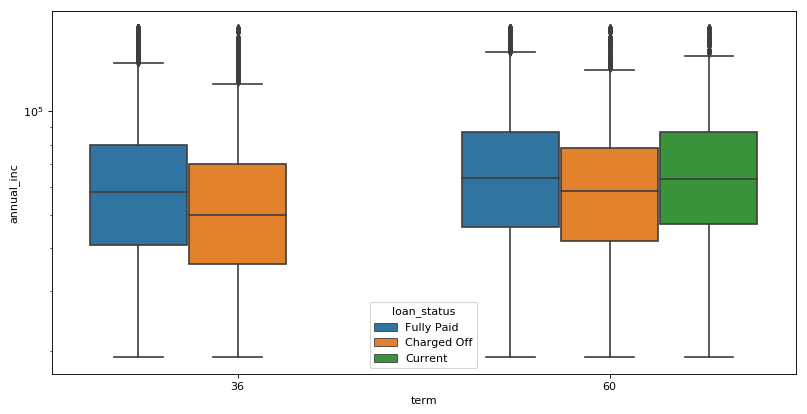

In [478]:
# create figure object
plt.figure(num=None,figsize=(12,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="term", y="annual_inc",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

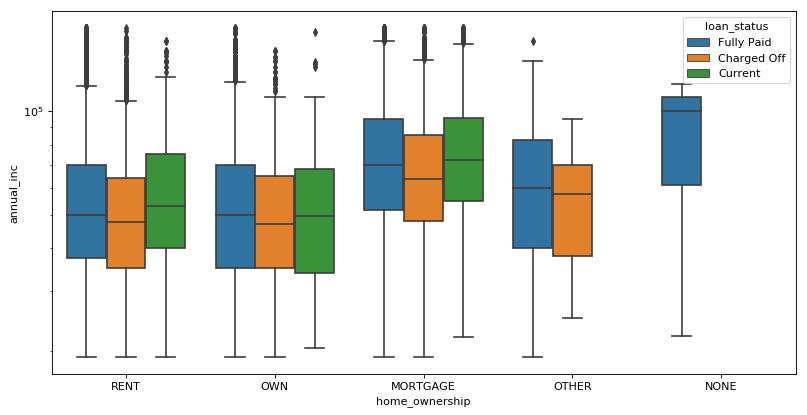

In [479]:
plt.figure(num=None,figsize=(12,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="home_ownership", y="annual_inc",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

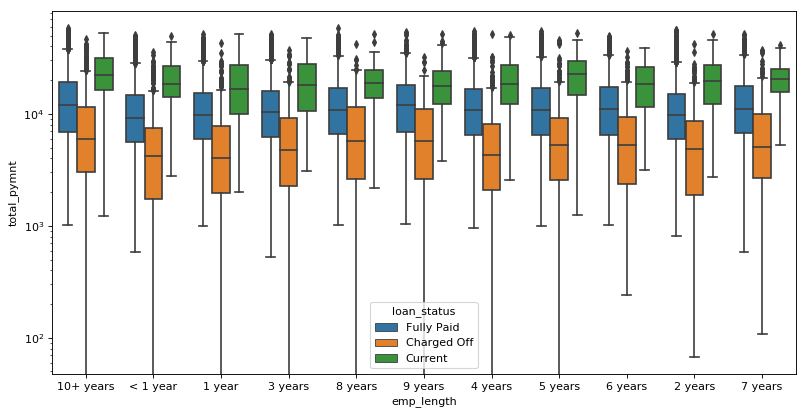

In [480]:
plt.figure(num=None,figsize=(12,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="emp_length", y="total_pymnt",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

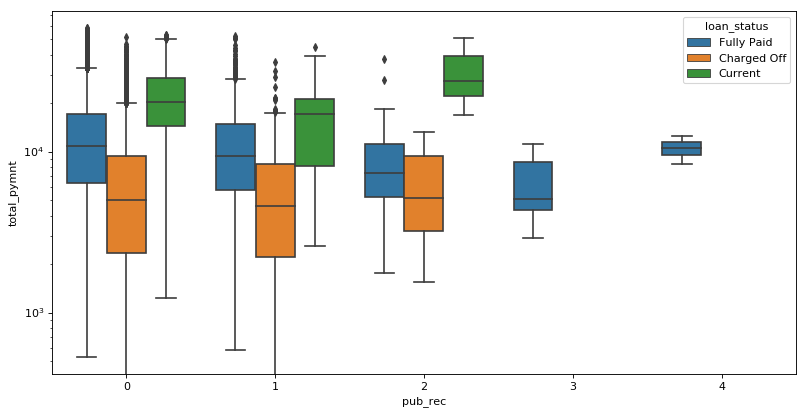

In [481]:
plt.figure(num=None,figsize=(12,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="pub_rec", y="total_pymnt",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

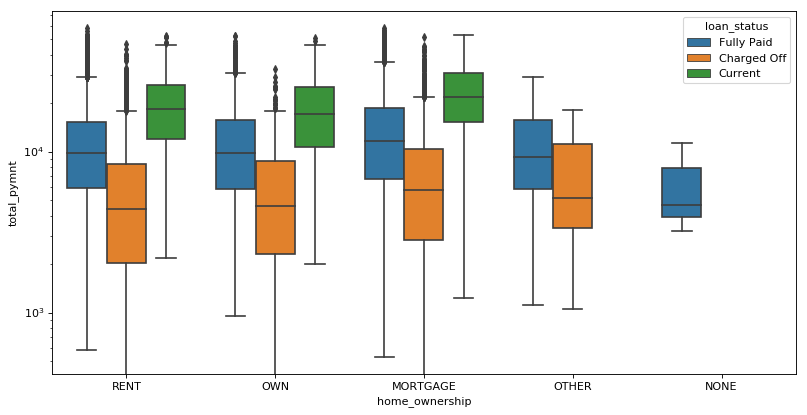

In [482]:
plt.figure(num=None,figsize=(12,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="home_ownership", y="total_pymnt",hue='loan_status', data=loan_stats)
val1.set(yscale="log")
plt.show()

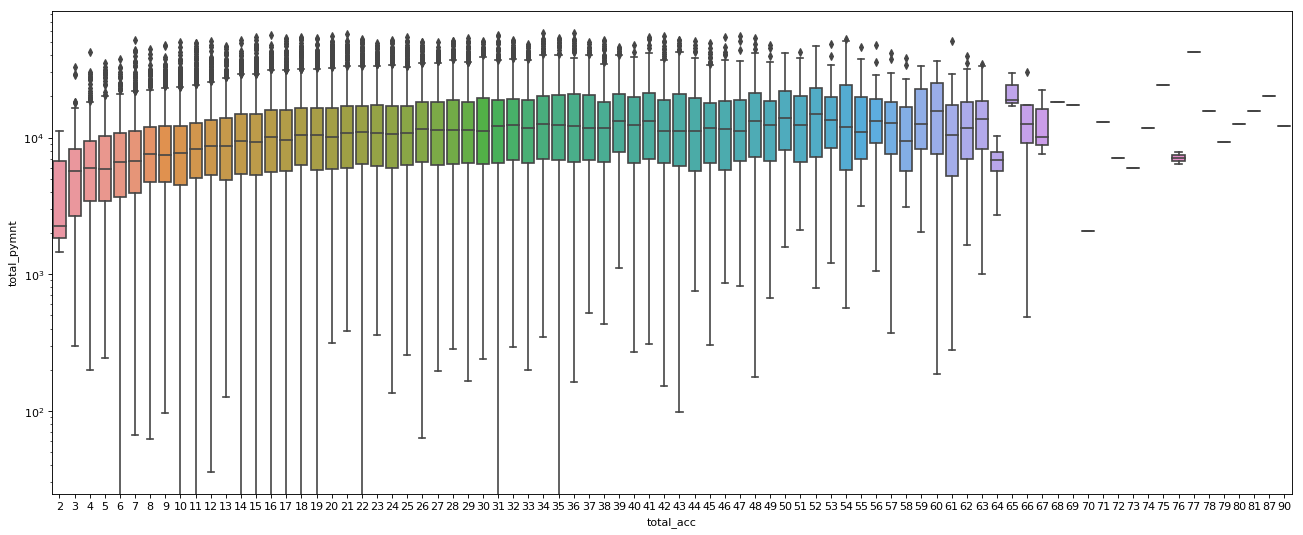

In [483]:
plt.figure(num=None,figsize=(20,8),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="total_acc", y="total_pymnt", data=loan_stats)
val1.set(yscale="log")
plt.show()

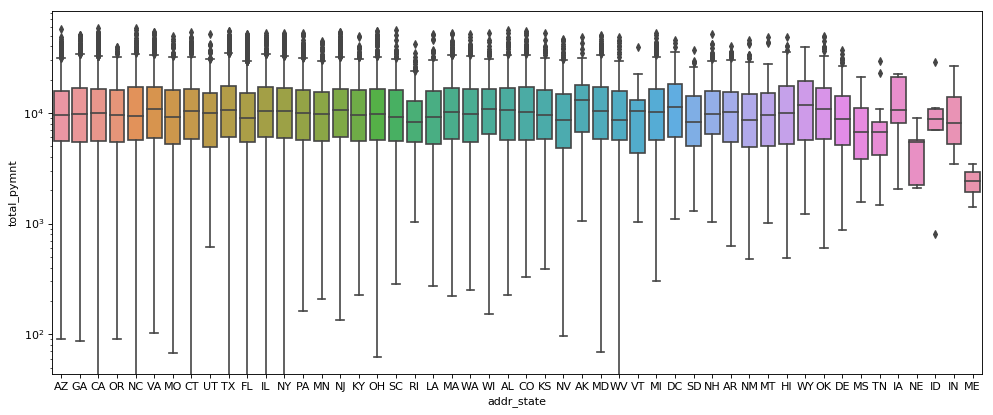

In [484]:
plt.figure(num=None,figsize=(15,6),dpi=80,facecolor='w',edgecolor='k')
val1 = sns.boxplot(x="addr_state", y="total_pymnt", data=loan_stats)
val1.set(yscale="log")
plt.show()

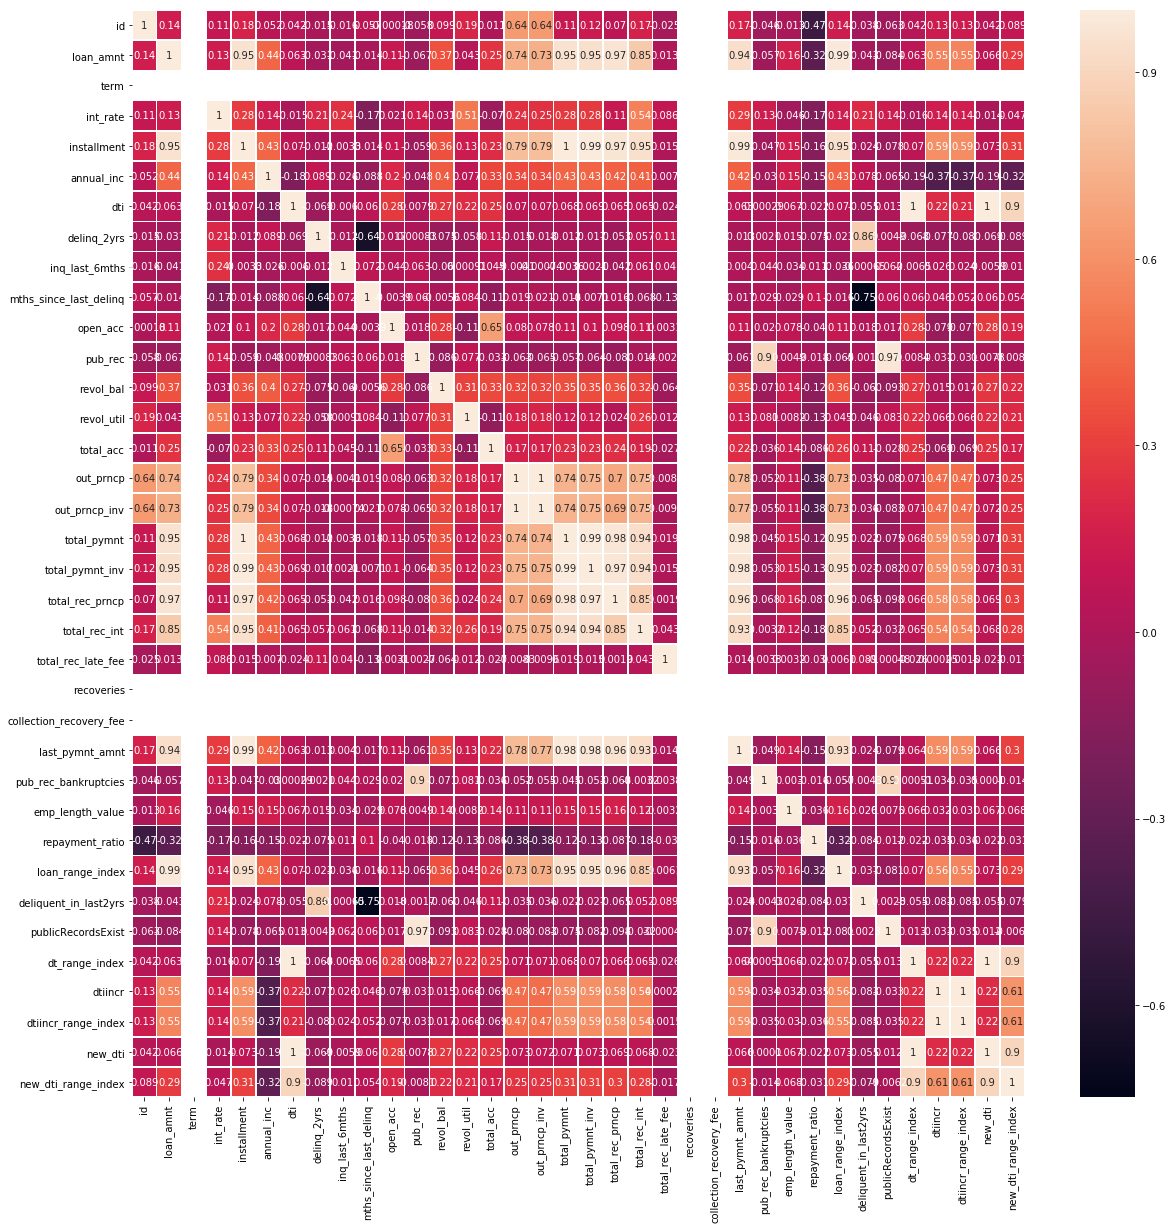

In [485]:
#CHeckpoint - Find Correlations (bivariate analysis)
#1. Between loan-amt and interest rate
#2. Between loan - amt and income
#3. Any other?

# Find correlations between 'customer_info' and 'customer_status'

cust_info_status_corr = loan_stats[['emp_length', 'home_ownership','annual_inc','purpose','addr_state',
                                    'verification_status','dti','open_acc','revol_bal','total_acc','total_pymnt',
                                   'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']].copy()


v_corr = loan_current.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
# plot the heatmap and annotation on it

sns.heatmap(v_corr, xticklabels=v_corr.columns, yticklabels=v_corr.columns, annot=True, linewidths=.5,ax=ax)
plt.show()
